In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Getting Started 
Make sure your select ***ros_base*** as your kernel. You can do this by clicking on the kernel dropdown menu and selecting *ros_base*.


## Import Python dependencies

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, cm
from IPython.display import HTML
import numpy as np
import csv

import tqdm as tqdm

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from ILQR import RefPath
from ILQR import ILQR



In [65]:
def load_path(filepath: str):
    """
    Gets the centerline of the track from the trajectory data. We currently only
    support 2D track.

    Args:
        filepath (str): the path to file consisting of the centerline position.

    Returns:
        np.ndarray: centerline, of the shape (2, N).
    """
    x = []
    y = []
    with open(filepath) as f:
        spamreader = csv.reader(f, delimiter=',')
        for i, row in enumerate(spamreader):
            if i > 0:
                x.append(float(row[0]))
                y.append(float(row[1]))

    return np.array([x, y])

## Generate a reference trajectory

In [66]:
# Define the file paths
config_file = 'task1/task1.yaml'
track_path = 'task1/ref_path.csv'

# Load the reference path
x = []
y = []
left_width = []
right_width = []
with open(track_path, newline='') as f:
    spamreader = csv.reader(f, delimiter=',')
    for i, row in enumerate(spamreader):
        if i>0:
            x.append(float(row[0]))
            y.append(float(row[1]))
            left_width.append(float(row[3]))
            right_width.append(float(row[2]))
            
x = np.array(x)/30.0
y = np.array(y)/30.0
left_width = np.array(left_width)
right_width = np.array(right_width)
center_line = np.array([x,y])


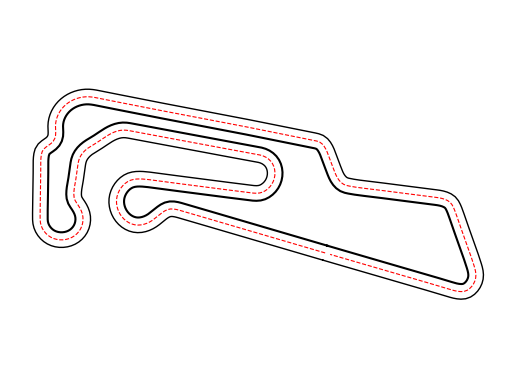

In [67]:
# Create a reference path
ref_path = RefPath(center_line, width_left = 0.6, width_right = 0.6, speed_limt = 5, loop = True)

# Visualize the reference path
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
plt.axis('equal')
_ = plt.axis('off')


## Test your ILQR planner
The planner need to warmup for a few steps for the first time it is run. This process will takes 10-30 seconds depending on your computer.

In [68]:
ilqr = ILQR(config_file)
ilqr.update_ref_path(ref_path)


Line Search Alphas:  [10.    1.    0.1   0.01]
ILQR setting: ILQR config: {'num_dim_x': 5, 'num_dim_u': 2, 'T': 10, 'dt': 0.1, 'platform': 'cpu', 'max_iter': 50, 'tol': 0.05, 'line_search_base': 0.1, 'line_search_a': -1, 'line_search_b': 3, 'line_search_c': 1, 'reg_min': '1e-5', 'reg_max': '1e8', 'reg_scale_down': 5, 'reg_scale_up': 5, 'reg_init': 1.0, 'max_attempt': 5, 'wheelbase': 0.257, 'radius': 0.13, 'width': 0.22, 'length': 0.4, 'delta_max': 0.35, 'delta_min': -0.35, 'v_max': 5.0, 'v_min': 0.0, 'omega_min': -6.0, 'omega_max': 6.0, 'a_max': 5.0, 'a_min': -5.0, 'v_ref': 5.0, 'dim_closest_pt_x': 0, 'dim_closest_pt_y': 1, 'dim_path_slope': 2, 'path_cost_type': 'quadratic', 'path_weight': 2.0, 'path_huber_delta': 2, 'vel_cost_type': 'quadratic', 'vel_weight': 0.2, 'vel_huber_delta': 1, 'dim_vel_limit': 3, 'vel_limit_a': 10.0, 'vel_limit_b': 1.0, 'heading_cost_type': 'quadratic', 'heading_weight': 1, 'heading_huber_delta': 1, 'lat_accel_thres': 6.0, 'lat_accel_a': 5.0, 'lat_accel_b': 2

### Plan for one step

J_new: 40501.109375; J: 172.57464599609375
J_new: 2804.77783203125; J: 172.57464599609375
J_new: 1450.0347900390625; J: 172.57464599609375
J_new: 149.3778076171875; J: 172.57464599609375
J_new: 14108.8544921875; J: 149.3778076171875
J_new: 2227.3037109375; J: 149.3778076171875
J_new: 831.6668701171875; J: 149.3778076171875
J_new: 141.96290588378906; J: 149.3778076171875
J_new: 5854.9248046875; J: 141.96290588378906
J_new: 1775.330078125; J: 141.96290588378906
J_new: 823.3472290039062; J: 141.96290588378906
J_new: 137.9850616455078; J: 141.96290588378906
J_new: 2900.6484375; J: 137.9850616455078
J_new: 1439.4794921875; J: 137.9850616455078
J_new: 123.59489440917969; J: 137.9850616455078
J_new: 2368.08203125; J: 123.59489440917969
J_new: 1330.5535888671875; J: 123.59489440917969
J_new: 115.8510513305664; J: 123.59489440917969
J_new: 1750.49267578125; J: 115.8510513305664
J_new: 1019.3355712890625; J: 115.8510513305664
J_new: 113.20684814453125; J: 115.8510513305664
J_new: 1433.2028808593

Text(0.5, 1.0, 'Lateral Acceleration')

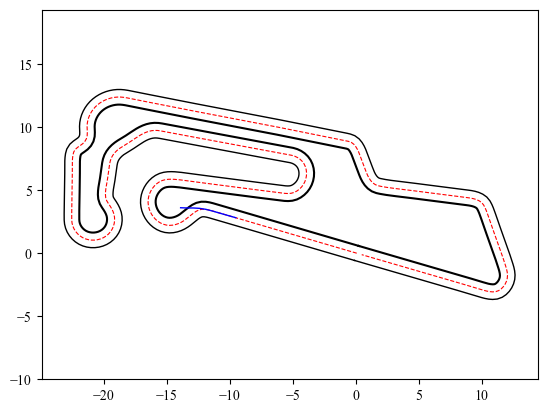

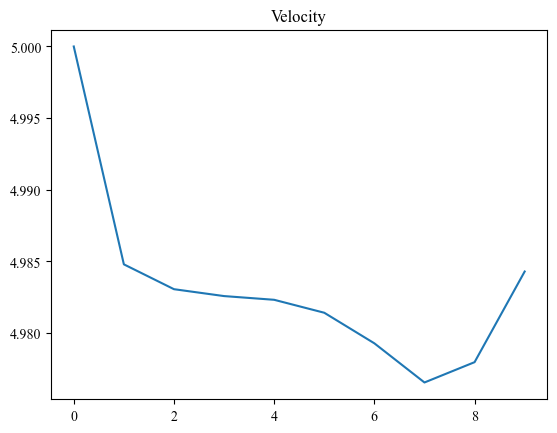

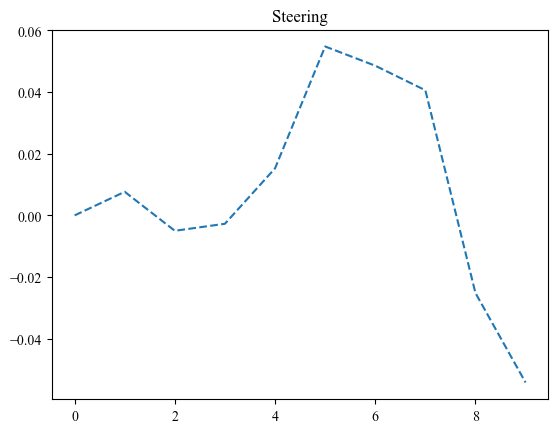

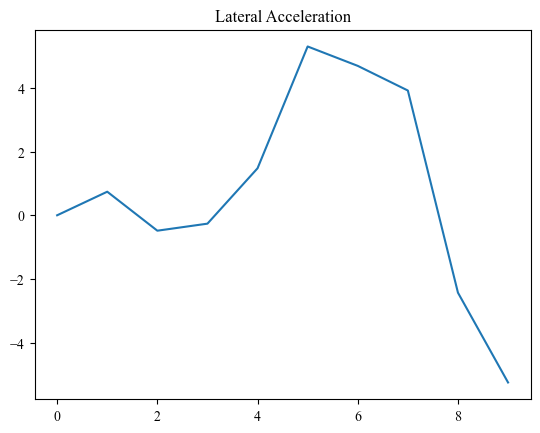

In [69]:
# Create an ILQR solver
x_init = np.array([x[60], y[60], 5, np.arctan2(y[61]-y[60], x[61]-x[60]), 0])
plan = ilqr.plan(x_init)

# Visualize the reference path
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
plt.plot(plan['trajectory'][0, :], plan['trajectory'][1, :], 'b-', linewidth=1)
plt.axis('equal')

plt.figure()
a = plan['trajectory'][2, :] 
plt.plot(a)
plt.title('Velocity')

plt.figure()
# plt.plot(plan['controls'][0,:])
plt.plot(plan['trajectory'][-1,:], '--')
plt.title('Steering')

plt.figure()
a = plan['trajectory'][2, :]**2 / 0.257 * np.tan(plan['trajectory'][-1, :])
plt.plot(a)
plt.title('Lateral Acceleration')


### Plan for the entire track

In [70]:
itr_receding = 400
init_control = np.zeros((2, ilqr.T))
x_cur = np.array([x[0], y[0], 4, np.arctan2(y[1]-y[0], x[1]-x[0]), 0])
state_history = np.zeros((5,itr_receding + 1))
state_history[:,0] = x_cur
plan_history = np.zeros((5, ilqr.T, itr_receding))
control_history = np.zeros((2,itr_receding))
t_process = np.zeros(itr_receding)
for i in (pbar := tqdm.tqdm(range(itr_receding))):
    plan = ilqr.plan(x_cur, init_control)
    
    trajectory = plan['trajectory']
    controls = plan['controls']
    
    # record the state and control
    state_history[:,i+1]  = trajectory[:,1]
    control_history[:,i] = controls[:,0]
    plan_history[:,:,i] = trajectory
    t_process[i] = plan['t_process']
    
    # prepare for next iteration
    x_cur = trajectory[:,1] 
    init_control[:,:-1] = controls[:,1:]
    
    pbar.set_description(f"ILQR takes : {plan['t_process']:.2f} sec']")

ILQR takes : 0.01 sec']:   5%|██████▌                                                                                                                                    | 19/400 [00:00<00:04, 95.20it/s]

J_new: 160.98416137695312; J: 145.89901733398438
J_new: -4.75009822845459; J: 145.89901733398438
J_new: -4.554519176483154; J: -4.75009822845459
J_new: -4.772167205810547; J: -4.75009822845459
converged after  1  steps.
J_new: 6.618920803070068; J: -5.5283379554748535
J_new: -5.260929584503174; J: -5.5283379554748535
J_new: -5.51197624206543; J: -5.5283379554748535
J_new: -5.52672004699707; J: -5.5283379554748535
line search failed with reg =  5.0  at step  0
J_new: 16.932231903076172; J: -5.986665725708008
J_new: -5.54158353805542; J: -5.986665725708008
J_new: -5.968114852905273; J: -5.986665725708008
J_new: -5.984957218170166; J: -5.986665725708008
line search failed with reg =  5.0  at step  0
J_new: 27.779979705810547; J: -6.263318061828613
J_new: -5.689825534820557; J: -6.263318061828613
J_new: -6.259593963623047; J: -6.263318061828613
J_new: -6.2623090744018555; J: -6.263318061828613
line search failed with reg =  5.0  at step  0
J_new: 37.73775100708008; J: -7.044993877410889
J_

ILQR takes : 0.03 sec']:   7%|██████████                                                                                                                                 | 29/400 [00:00<00:05, 67.35it/s]

J_new: 292.5638732910156; J: -6.138871669769287
J_new: -6.172584056854248; J: -6.138871669769287
converged after  1  steps.
J_new: 266.241455078125; J: -6.6724348068237305
J_new: -6.622769355773926; J: -6.6724348068237305
J_new: -6.668670177459717; J: -6.6724348068237305
J_new: -6.670756816864014; J: -6.6724348068237305
line search failed with reg =  5.0  at step  0
J_new: 252.2217559814453; J: -8.11373519897461
J_new: -8.061361312866211; J: -8.11373519897461
J_new: -8.114669799804688; J: -8.11373519897461
converged after  0  steps.
J_new: 3306.51806640625; J: -10.446223258972168
J_new: 1029.8421630859375; J: -10.446223258972168
J_new: 142.05081176757812; J: -10.446223258972168
J_new: 40.45479965209961; J: -10.446223258972168
line search failed with reg =  5.0  at step  0
J_new: 10762.5751953125; J: 94.66476440429688
J_new: 1622.0302734375; J: 94.66476440429688
J_new: 322.85589599609375; J: 94.66476440429688
J_new: 85.85956573486328; J: 94.66476440429688
J_new: 4556.13037109375; J: 85.

ILQR takes : 0.03 sec']:   9%|████████████▊                                                                                                                              | 37/400 [00:00<00:06, 54.46it/s]

J_new: 173.58885192871094; J: 182.29905700683594
J_new: 47916.86328125; J: 173.58885192871094
J_new: 670.7138671875; J: 173.58885192871094
J_new: 191.6327667236328; J: 173.58885192871094
J_new: 174.11924743652344; J: 173.58885192871094
line search failed with reg =  125.0  at step  1
J_new: 35617.4921875; J: 243.5948028564453
J_new: 586.5958251953125; J: 243.5948028564453
J_new: 259.17230224609375; J: 243.5948028564453
J_new: 239.40390014648438; J: 243.5948028564453
J_new: 34426.7421875; J: 239.40390014648438
J_new: 836.6009521484375; J: 239.40390014648438
J_new: 241.74142456054688; J: 239.40390014648438
J_new: 239.65904235839844; J: 239.40390014648438
line search failed with reg =  125.0  at step  1
J_new: 22686.73828125; J: 340.1207275390625
J_new: 551.126953125; J: 340.1207275390625
J_new: 334.71002197265625; J: 340.1207275390625
J_new: 54292.265625; J: 334.71002197265625
J_new: 952.749755859375; J: 334.71002197265625
J_new: 464.00689697265625; J: 334.71002197265625
J_new: 335.56723

ILQR takes : 0.02 sec']:  13%|█████████████████▋                                                                                                                         | 51/400 [00:00<00:05, 59.64it/s]

J_new: 883.86669921875; J: 3.60897159576416
J_new: 4.027885437011719; J: 3.60897159576416
J_new: 3.6244254112243652; J: 3.60897159576416
J_new: 3.6099853515625; J: 3.60897159576416
line search failed with reg =  5.0  at step  0
J_new: 1159.9671630859375; J: 2.6766092777252197
J_new: 3.2286362648010254; J: 2.6766092777252197
J_new: 2.6695001125335693; J: 2.6766092777252197
converged after  0  steps.
J_new: 844.0911254882812; J: 2.0412440299987793
J_new: 2.5722134113311768; J: 2.0412440299987793
J_new: 1.9848382472991943; J: 2.0412440299987793
J_new: 429.4904479980469; J: 1.9848382472991943
J_new: 2.255505084991455; J: 1.9848382472991943
J_new: 1.9832863807678223; J: 1.9848382472991943
converged after  1  steps.
J_new: 735.8909301757812; J: 1.4418251514434814
J_new: 1.9869415760040283; J: 1.4418251514434814
J_new: 1.3815993070602417; J: 1.4418251514434814
J_new: 345.28948974609375; J: 1.3815993070602417
J_new: 1.676838755607605; J: 1.3815993070602417
J_new: 1.3686184883117676; J: 1.38159

ILQR takes : 0.01 sec']:  16%|██████████████████████▉                                                                                                                    | 66/400 [00:01<00:05, 62.85it/s]

J_new: 0.5045021772384644; J: -1.7620095014572144
J_new: -1.8017085790634155; J: -1.7620095014572144
converged after  0  steps.
J_new: 1409.7747802734375; J: -1.8458857536315918
J_new: 0.01246631145477295; J: -1.8458857536315918
J_new: -1.9648151397705078; J: -1.8458857536315918
J_new: 1083.466796875; J: -1.9648151397705078
J_new: -1.473790168762207; J: -1.9648151397705078
J_new: -1.961551308631897; J: -1.9648151397705078
J_new: -1.9570258855819702; J: -1.9648151397705078
line search failed with reg =  25.0  at step  1
J_new: 1571.0892333984375; J: -1.866939902305603
J_new: -1.1239508390426636; J: -1.866939902305603
J_new: -1.9786614179611206; J: -1.866939902305603
J_new: 1319.6766357421875; J: -1.9786614179611206
J_new: -1.8243257999420166; J: -1.9786614179611206
J_new: -2.076205015182495; J: -1.9786614179611206
J_new: 201.57521057128906; J: -2.076205015182495
J_new: -2.109802007675171; J: -2.076205015182495
converged after  2  steps.
J_new: 1031.8306884765625; J: -2.2194204330444336


ILQR takes : 0.02 sec']:  18%|█████████████████████████▋                                                                                                                 | 74/400 [00:01<00:04, 65.60it/s]

J_new: 470.04852294921875; J: -5.556100368499756
J_new: -4.970954895019531; J: -5.556100368499756
J_new: -5.57661771774292; J: -5.556100368499756
converged after  0  steps.
J_new: 393.63336181640625; J: -5.537470817565918
J_new: -5.060236930847168; J: -5.537470817565918
J_new: -5.623127460479736; J: -5.537470817565918
J_new: 250.587890625; J: -5.623127460479736
J_new: -5.509370803833008; J: -5.623127460479736
J_new: -5.654628276824951; J: -5.623127460479736
converged after  1  steps.
J_new: 322.6549377441406; J: -5.372400283813477
J_new: -5.043869495391846; J: -5.372400283813477
J_new: -5.5206804275512695; J: -5.372400283813477
J_new: 232.14971923828125; J: -5.5206804275512695
J_new: -5.638481140136719; J: -5.5206804275512695
J_new: -3.8878564834594727; J: -5.638481140136719
J_new: -5.682710647583008; J: -5.638481140136719
converged after  2  steps.
J_new: 361.21685791015625; J: -6.101366996765137
J_new: -5.909842491149902; J: -6.101366996765137
J_new: -6.084357738494873; J: -6.1013669

ILQR takes : 0.01 sec']:  20%|████████████████████████████▏                                                                                                              | 81/400 [00:01<00:06, 50.52it/s]

J_new: 8322.07421875; J: 40.139366149902344
J_new: 450.52337646484375; J: 40.139366149902344
J_new: 59.716766357421875; J: 40.139366149902344
J_new: 46.60704040527344; J: 40.139366149902344
line search failed with reg =  25.0  at step  0
J_new: 10946.2412109375; J: 114.184326171875
J_new: 579.2139282226562; J: 114.184326171875
J_new: 121.12425994873047; J: 114.184326171875
J_new: 114.87812042236328; J: 114.184326171875
line search failed with reg =  25.0  at step  0
J_new: 10837.8115234375; J: 216.3771514892578
J_new: 959.8599243164062; J: 216.3771514892578
J_new: 186.83702087402344; J: 216.3771514892578
J_new: 27589.392578125; J: 186.83702087402344
J_new: 804.3651123046875; J: 186.83702087402344
J_new: 134.11834716796875; J: 186.83702087402344
J_new: 4533.708984375; J: 134.11834716796875
J_new: 21.036672592163086; J: 134.11834716796875
J_new: 120.98606872558594; J: 21.036672592163086
J_new: 16.717864990234375; J: 21.036672592163086
J_new: 13.168909072875977; J: 16.717864990234375
J_ne

ILQR takes : 0.01 sec']:  24%|█████████████████████████████████▎                                                                                                         | 96/400 [00:01<00:05, 51.63it/s]

J_new: 860.282470703125; J: 0.23782747983932495
J_new: 0.4775158166885376; J: 0.23782747983932495
J_new: 0.25196245312690735; J: 0.23782747983932495
J_new: 0.2344413548707962; J: 0.23782747983932495
converged after  0  steps.
J_new: 985.7868041992188; J: -0.006946094334125519
J_new: 13.87131118774414; J: -0.006946094334125519
J_new: -0.0027513355016708374; J: -0.006946094334125519
J_new: -0.012881852686405182; J: -0.006946094334125519
converged after  0  steps.
J_new: 1621.0831298828125; J: 0.11148887872695923
J_new: 190.74984741210938; J: 0.11148887872695923
J_new: 0.03673234581947327; J: 0.11148887872695923
J_new: 1430.1390380859375; J: 0.03673234581947327
J_new: 181.07913208007812; J: 0.03673234581947327
J_new: -0.030902989208698273; J: 0.03673234581947327
J_new: 333.92999267578125; J: -0.030902989208698273
J_new: 213.37783813476562; J: -0.030902989208698273
J_new: -0.05700642615556717; J: -0.030902989208698273
converged after  2  steps.
J_new: 1877.8948974609375; J: 0.8658258318901

ILQR takes : 0.03 sec']:  26%|███████████████████████████████████▉                                                                                                      | 104/400 [00:01<00:05, 57.12it/s]

J_new: 982.53173828125; J: 32.31935501098633
line search failed with reg =  5.0  at step  0
J_new: 4202.748046875; J: 35.82146072387695
J_new: 2509.8603515625; J: 35.82146072387695
J_new: 1581.1357421875; J: 35.82146072387695
J_new: 1563.9346923828125; J: 35.82146072387695
line search failed with reg =  5.0  at step  0
J_new: 5067.3251953125; J: 37.792423248291016
J_new: 1995.5126953125; J: 37.792423248291016
J_new: 1826.9742431640625; J: 37.792423248291016
J_new: 1815.260009765625; J: 37.792423248291016
line search failed with reg =  5.0  at step  0
J_new: 3980.734130859375; J: 38.28035354614258
J_new: 2071.062255859375; J: 38.28035354614258
J_new: 1915.45947265625; J: 38.28035354614258
J_new: 1909.6474609375; J: 38.28035354614258
line search failed with reg =  5.0  at step  0
J_new: 2966.37451171875; J: 37.206363677978516
J_new: 32.04454040527344; J: 37.206363677978516
J_new: 14384.2255859375; J: 32.04454040527344
J_new: 164.79501342773438; J: 32.04454040527344
J_new: 37.667060852050

ILQR takes : 0.01 sec']:  30%|████████████████████████████████████████▋                                                                                                 | 118/400 [00:02<00:04, 57.50it/s]

J_new: 158.1172637939453; J: -4.9419050216674805
J_new: -4.406792640686035; J: -4.9419050216674805
J_new: -4.985850811004639; J: -4.9419050216674805
converged after  0  steps.
J_new: 168.32061767578125; J: -5.0545454025268555
J_new: -4.492622375488281; J: -5.0545454025268555
J_new: -5.129741191864014; J: -5.0545454025268555
J_new: 84.94047546386719; J: -5.129741191864014
J_new: -4.859375953674316; J: -5.129741191864014
J_new: -5.138338565826416; J: -5.129741191864014
converged after  1  steps.
J_new: 151.71250915527344; J: -5.211124897003174
J_new: -4.649535179138184; J: -5.211124897003174
J_new: -5.273678302764893; J: -5.211124897003174
J_new: 74.84919738769531; J: -5.273678302764893
J_new: -4.986711502075195; J: -5.273678302764893
J_new: -5.300104141235352; J: -5.273678302764893
converged after  1  steps.
J_new: 141.8636474609375; J: -5.438525676727295
J_new: -4.841473579406738; J: -5.438525676727295
J_new: -5.420717716217041; J: -5.438525676727295
J_new: -5.449143409729004; J: -5.43

ILQR takes : 0.03 sec']:  31%|██████████████████████████████████████████▊                                                                                               | 124/400 [00:02<00:05, 49.74it/s]

J_new: 867.205078125; J: 15.078165054321289
J_new: 750.4794921875; J: 15.078165054321289
J_new: 14.522411346435547; J: 15.078165054321289
J_new: 2325.656494140625; J: 14.522411346435547
J_new: 1451.617431640625; J: 14.522411346435547
J_new: 724.249267578125; J: 14.522411346435547
J_new: 14.269246101379395; J: 14.522411346435547
J_new: 2241.38671875; J: 14.269246101379395
J_new: 729.0523071289062; J: 14.269246101379395
J_new: 718.4931030273438; J: 14.269246101379395
J_new: 717.4334716796875; J: 14.269246101379395
line search failed with reg =  15625.0  at step  5
J_new: 20764.640625; J: 49.434024810791016
J_new: 1400.0494384765625; J: 49.434024810791016
J_new: 285.35943603515625; J: 49.434024810791016
J_new: 38.83184051513672; J: 49.434024810791016
J_new: 16577.9765625; J: 38.83184051513672
J_new: 1577.212646484375; J: 38.83184051513672
J_new: 601.7578125; J: 38.83184051513672
J_new: 29.75239372253418; J: 38.83184051513672
J_new: 2595.342041015625; J: 29.75239372253418
J_new: 745.385131

ILQR takes : 0.03 sec']:  32%|████████████████████████████████████████████▊                                                                                             | 130/400 [00:02<00:07, 37.93it/s]

J_new: 182.92355346679688; J: 230.76153564453125
J_new: 44618.40625; J: 182.92355346679688
J_new: 779.2042846679688; J: 182.92355346679688
J_new: 245.23338317871094; J: 182.92355346679688
J_new: 149.0470733642578; J: 182.92355346679688
J_new: 22042.111328125; J: 149.0470733642578
J_new: 1260.343505859375; J: 149.0470733642578
J_new: 238.01980590820312; J: 149.0470733642578
J_new: 125.67839050292969; J: 149.0470733642578
J_new: 3907.32568359375; J: 125.67839050292969
J_new: 1148.1531982421875; J: 125.67839050292969
J_new: 93.14704132080078; J: 125.67839050292969
J_new: 3157.12890625; J: 93.14704132080078
J_new: 786.4757080078125; J: 93.14704132080078
J_new: 55.820560455322266; J: 93.14704132080078
J_new: 245.55467224121094; J: 55.820560455322266
J_new: 50.7059440612793; J: 55.820560455322266
J_new: 449.16070556640625; J: 50.7059440612793
J_new: 51.1905517578125; J: 50.7059440612793
J_new: 48.60528564453125; J: 50.7059440612793
J_new: 47.8927116394043; J: 48.60528564453125
J_new: 47.4213

ILQR takes : 0.12 sec']:  34%|██████████████████████████████████████████████▌                                                                                           | 135/400 [00:02<00:06, 38.70it/s]

J_new: 11707.95703125; J: 9.542363166809082
J_new: 28.315765380859375; J: 9.542363166809082
J_new: 6.858845233917236; J: 9.542363166809082
J_new: 18362.240234375; J: 6.858845233917236
J_new: 99.3187026977539; J: 6.858845233917236
J_new: 22.393129348754883; J: 6.858845233917236
J_new: 8.58000373840332; J: 6.858845233917236
line search failed with reg =  125.0  at step  1
J_new: 12583.396484375; J: 7.128544807434082
J_new: 35.08363342285156; J: 7.128544807434082
J_new: 6.102379322052002; J: 7.128544807434082
J_new: 2388.34912109375; J: 6.102379322052002
J_new: 0.7679586410522461; J: 6.102379322052002
J_new: 272.2723693847656; J: 0.7679586410522461
J_new: -0.7109062671661377; J: 0.7679586410522461
J_new: -1.3206725120544434; J: -0.7109062671661377
J_new: -1.8223161697387695; J: -1.3206725120544434
J_new: -2.0346508026123047; J: -1.8223161697387695
J_new: -2.041799306869507; J: -2.0346508026123047
converged after  6  steps.
J_new: 1702.1259765625; J: -1.9016326665878296
J_new: -3.177009105

ILQR takes : 0.05 sec']:  34%|██████████████████████████████████████████████▌                                                                                           | 135/400 [00:02<00:06, 38.70it/s]

J_new: -3.749065399169922; J: -3.611611843109131
J_new: 1067.50048828125; J: -3.749065399169922
J_new: 7.242947578430176; J: -3.749065399169922
J_new: -3.8943655490875244; J: -3.749065399169922
J_new: 365.20556640625; J: -3.8943655490875244
J_new: -4.500658988952637; J: -3.8943655490875244
J_new: 35.6987419128418; J: -4.500658988952637
J_new: -4.611522197723389; J: -4.500658988952637
J_new: -4.5557355880737305; J: -4.611522197723389
J_new: -4.625179290771484; J: -4.611522197723389
converged after  4  steps.
J_new: 721.9845581054688; J: -5.025406360626221
J_new: -4.701486110687256; J: -5.025406360626221
J_new: -5.004554748535156; J: -5.025406360626221
J_new: -5.008070945739746; J: -5.025406360626221
line search failed with reg =  5.0  at step  0
J_new: 1056.4630126953125; J: -5.261685371398926
J_new: -4.62603235244751; J: -5.261685371398926
J_new: -5.244621276855469; J: -5.261685371398926
J_new: -5.2616472244262695; J: -5.261685371398926
line search failed with reg =  5.0  at step  0


ILQR takes : 0.11 sec']:  35%|████████████████████████████████████████████████▎                                                                                         | 140/400 [00:03<00:11, 23.27it/s]

J_new: 1725.066162109375; J: -4.497567653656006
J_new: 73.97530364990234; J: -4.497567653656006
J_new: -4.588497161865234; J: -4.497567653656006
J_new: 1560.94873046875; J: -4.588497161865234
J_new: 17.22896385192871; J: -4.588497161865234
J_new: -4.729942798614502; J: -4.588497161865234
J_new: 635.90869140625; J: -4.729942798614502
J_new: -4.909857749938965; J: -4.729942798614502
J_new: -4.46929931640625; J: -4.909857749938965
J_new: -4.915355205535889; J: -4.909857749938965
converged after  3  steps.
J_new: 1287.6270751953125; J: -2.143615961074829
J_new: 108.75899505615234; J: -2.143615961074829
J_new: -2.481414794921875; J: -2.143615961074829
J_new: 1228.0806884765625; J: -2.481414794921875
J_new: 49.574127197265625; J: -2.481414794921875
J_new: -2.755525827407837; J: -2.481414794921875
J_new: 522.5046997070312; J: -2.755525827407837
J_new: -3.6057891845703125; J: -2.755525827407837
J_new: 107.34127807617188; J: -3.6057891845703125
J_new: -4.0238237380981445; J: -3.6057891845703125

ILQR takes : 0.16 sec']:  35%|████████████████████████████████████████████████▎                                                                                         | 140/400 [00:03<00:11, 23.27it/s]

J_new: -3.5531117916107178; J: -4.0238237380981445
J_new: -4.103964805603027; J: -4.0238237380981445
J_new: -4.075016975402832; J: -4.103964805603027
J_new: -4.118917465209961; J: -4.103964805603027
converged after  5  steps.
J_new: 1045.8592529296875; J: 2.412616014480591
J_new: 99.85835266113281; J: 2.412616014480591
J_new: 1.7810258865356445; J: 2.412616014480591
J_new: 834.1171264648438; J: 1.7810258865356445
J_new: 56.82011795043945; J: 1.7810258865356445
J_new: 1.2577606439590454; J: 1.7810258865356445
J_new: 550.8635864257812; J: 1.2577606439590454
J_new: 6.279880523681641; J: 1.2577606439590454
J_new: 0.7997009754180908; J: 1.2577606439590454
J_new: 205.17422485351562; J: 0.7997009754180908
J_new: -1.0606536865234375; J: 0.7997009754180908
J_new: 10.550436973571777; J: -1.0606536865234375
J_new: -1.4014878273010254; J: -1.0606536865234375
J_new: -1.3337092399597168; J: -1.4014878273010254
J_new: -1.457524061203003; J: -1.4014878273010254


ILQR takes : 0.18 sec']:  35%|████████████████████████████████████████████████▎                                                                                         | 140/400 [00:03<00:11, 23.27it/s]

J_new: -1.4980669021606445; J: -1.457524061203003
converged after  6  steps.
J_new: 2621.28369140625; J: 23.415346145629883
J_new: 329.97296142578125; J: 23.415346145629883
J_new: 39.54825973510742; J: 23.415346145629883
J_new: 21.81305503845215; J: 23.415346145629883
J_new: 2174.560546875; J: 21.81305503845215
J_new: 359.3282165527344; J: 21.81305503845215
J_new: 40.37049102783203; J: 21.81305503845215
J_new: 20.272480010986328; J: 21.81305503845215
J_new: 1058.2249755859375; J: 20.272480010986328
J_new: 406.1020202636719; J: 20.272480010986328
J_new: 20.2736873626709; J: 20.272480010986328
J_new: 19.34031105041504; J: 20.272480010986328
J_new: 1760.781982421875; J: 19.34031105041504
J_new: 54.48874282836914; J: 19.34031105041504
J_new: 14.97791576385498; J: 19.34031105041504
J_new: 899.7291870117188; J: 14.97791576385498
J_new: 7.255688190460205; J: 14.97791576385498
J_new: 55.423545837402344; J: 7.255688190460205
J_new: 6.340155601501465; J: 7.255688190460205


ILQR takes : 0.09 sec']:  36%|█████████████████████████████████████████████████▋                                                                                        | 144/400 [00:03<00:18, 13.93it/s]

J_new: 6.102717876434326; J: 6.340155601501465
J_new: 5.9420013427734375; J: 6.102717876434326
J_new: 5.805171012878418; J: 5.9420013427734375
J_new: 5.795295238494873; J: 5.805171012878418
converged after  9  steps.
J_new: 17152.125; J: 89.65570068359375
J_new: 126.88550567626953; J: 89.65570068359375
J_new: 73.34614562988281; J: 89.65570068359375
J_new: 16146.376953125; J: 73.34614562988281
J_new: 235.94094848632812; J: 73.34614562988281
J_new: 78.27549743652344; J: 73.34614562988281
J_new: 73.41817474365234; J: 73.34614562988281
line search failed with reg =  125.0  at step  1
J_new: 37389.05078125; J: 240.42576599121094
J_new: 158.75250244140625; J: 240.42576599121094
J_new: 20777064.0; J: 158.75250244140625
J_new: 38668.89453125; J: 158.75250244140625
J_new: 166.4378662109375; J: 158.75250244140625


ILQR takes : 0.17 sec']:  36%|█████████████████████████████████████████████████▋                                                                                        | 144/400 [00:03<00:18, 13.93it/s]

J_new: 160.69113159179688; J: 158.75250244140625
line search failed with reg =  125.0  at step  1
J_new: 48286.59375; J: 150.2969512939453
J_new: 409.0788879394531; J: 150.2969512939453
J_new: 321.0206298828125; J: 150.2969512939453
J_new: 149.5234375; J: 150.2969512939453
J_new: 6294714.0; J: 149.5234375
J_new: 27305.55078125; J: 149.5234375
J_new: 138.4733428955078; J: 149.5234375
J_new: 12206.4560546875; J: 138.4733428955078
J_new: 1427.2479248046875; J: 138.4733428955078
J_new: 763.1220703125; J: 138.4733428955078
J_new: 424.7989807128906; J: 138.4733428955078
line search failed with reg =  625.0  at step  2


ILQR takes : 0.09 sec']:  37%|██████████████████████████████████████████████████▋                                                                                       | 147/400 [00:04<00:20, 12.50it/s]

J_new: 67274.1015625; J: 126.50715637207031
J_new: 1563.7625732421875; J: 126.50715637207031
J_new: 731.753662109375; J: 126.50715637207031
J_new: 125.69233703613281; J: 126.50715637207031
J_new: 156744.796875; J: 125.69233703613281
J_new: 1897.4503173828125; J: 125.69233703613281
J_new: 644.6751708984375; J: 125.69233703613281
J_new: 619.9063720703125; J: 125.69233703613281
line search failed with reg =  125.0  at step  1
J_new: 138853.75; J: 135.89651489257812
J_new: 1999.1729736328125; J: 135.89651489257812
J_new: 739.7310180664062; J: 135.89651489257812
J_new: 134.33901977539062; J: 135.89651489257812
J_new: 102191.546875; J: 134.33901977539062
J_new: 1599.4959716796875; J: 134.33901977539062
J_new: 720.22412109375; J: 134.33901977539062
J_new: 704.860107421875; J: 134.33901977539062
line search failed with reg =  125.0  at step  1
J_new: 541819.5625; J: 194.08123779296875
J_new: 3804.656982421875; J: 194.08123779296875
J_new: 909.978515625; J: 194.08123779296875


ILQR takes : 0.05 sec']:  38%|███████████████████████████████████████████████████▊                                                                                      | 150/400 [00:04<00:20, 12.26it/s]

J_new: 194.44207763671875; J: 194.08123779296875
line search failed with reg =  25.0  at step  0
J_new: 653671.0; J: 258.4461669921875
J_new: 3021.1044921875; J: 258.4461669921875
J_new: 235.64175415039062; J: 258.4461669921875
J_new: 197364.3125; J: 235.64175415039062
J_new: 1371.334228515625; J: 235.64175415039062
J_new: 594.8271484375; J: 235.64175415039062
J_new: 231.27264404296875; J: 235.64175415039062
J_new: 83035.265625; J: 231.27264404296875
J_new: 3840.5390625; J: 231.27264404296875
J_new: 614.6361083984375; J: 231.27264404296875
J_new: 636.541259765625; J: 231.27264404296875
line search failed with reg =  625.0  at step  2
J_new: 15633015.0; J: 187.41470336914062
J_new: 6845090.5; J: 187.41470336914062
J_new: 8367121.0; J: 187.41470336914062
J_new: 8109949.0; J: 187.41470336914062
line search failed with reg =  25.0  at step  0
J_new: 547259.375; J: 152.2816162109375
J_new: 293806.1875; J: 152.2816162109375
J_new: 316754.40625; J: 152.2816162109375
J_new: 146.91061401367188;

ILQR takes : 0.09 sec']:  38%|████████████████████████████████████████████████████▍                                                                                     | 152/400 [00:04<00:23, 10.43it/s]

J_new: 117.79554748535156; J: 118.50965881347656
J_new: 117.65519714355469; J: 117.79554748535156
J_new: 117.62693786621094; J: 117.65519714355469
converged after  9  steps.
J_new: 21121.8828125; J: 119.00021362304688
J_new: 270.3355407714844; J: 119.00021362304688
J_new: 94.04315185546875; J: 119.00021362304688
J_new: 2503036108800.0; J: 94.04315185546875
J_new: 327459471360.0; J: 94.04315185546875
J_new: 260900585472.0; J: 94.04315185546875
J_new: 108.30657958984375; J: 94.04315185546875
line search failed with reg =  125.0  at step  1
J_new: 47702.86328125; J: 116.02601623535156
J_new: 10543.0595703125; J: 116.02601623535156
J_new: 84.8896713256836; J: 116.02601623535156
J_new: 7367.07373046875; J: 84.8896713256836
J_new: 3212.43115234375; J: 84.8896713256836
J_new: 2957.046142578125; J: 84.8896713256836
J_new: 84.26486206054688; J: 84.8896713256836


ILQR takes : 0.05 sec']:  38%|█████████████████████████████████████████████████████▏                                                                                    | 154/400 [00:04<00:24, 10.20it/s]

J_new: 1826.66357421875; J: 84.26486206054688
J_new: 1485.33154296875; J: 84.26486206054688
J_new: 1448.6875; J: 84.26486206054688
J_new: 1442.531005859375; J: 84.26486206054688
line search failed with reg =  625.0  at step  2
J_new: 248707.734375; J: 102.10760498046875
J_new: 36028.9140625; J: 102.10760498046875
J_new: 28868.544921875; J: 102.10760498046875
J_new: 28212.974609375; J: 102.10760498046875
line search failed with reg =  25.0  at step  0
J_new: 192615.078125; J: 134.6699981689453
J_new: 3593.637939453125; J: 134.6699981689453
J_new: 88.09808349609375; J: 134.6699981689453
J_new: 3046.38818359375; J: 88.09808349609375
J_new: 1241.1871337890625; J: 88.09808349609375
J_new: 1246.971923828125; J: 88.09808349609375
J_new: 87.37704467773438; J: 88.09808349609375
J_new: 1360.063232421875; J: 87.37704467773438
J_new: 1013.7123413085938; J: 87.37704467773438
J_new: 1035.5615234375; J: 87.37704467773438
J_new: 86.97653198242188; J: 87.37704467773438


ILQR takes : 0.24 sec']:  39%|█████████████████████████████████████████████████████▊                                                                                    | 156/400 [00:05<00:26,  9.23it/s]

J_new: 707.3695678710938; J: 86.97653198242188
J_new: 770.6112670898438; J: 86.97653198242188
J_new: 784.5601196289062; J: 86.97653198242188
J_new: 86.7045669555664; J: 86.97653198242188
J_new: 522.8909912109375; J: 86.7045669555664
J_new: 570.125244140625; J: 86.7045669555664
J_new: 85.422119140625; J: 86.7045669555664
J_new: 475.0338134765625; J: 85.422119140625
J_new: 487.8675537109375; J: 85.422119140625
J_new: 489.17083740234375; J: 85.422119140625
J_new: 85.38833618164062; J: 85.422119140625
converged after  5  steps.
J_new: 17328.546875; J: 94.17743682861328
J_new: 1174.109619140625; J: 94.17743682861328
J_new: 63.328189849853516; J: 94.17743682861328
J_new: 3840.9111328125; J: 63.328189849853516
J_new: 61.36100387573242; J: 63.328189849853516
J_new: 433484.9375; J: 61.36100387573242
J_new: 64991.890625; J: 61.36100387573242
J_new: 52.528446197509766; J: 61.36100387573242


ILQR takes : 0.20 sec']:  39%|█████████████████████████████████████████████████████▊                                                                                    | 156/400 [00:05<00:26,  9.23it/s]

J_new: 3607.872314453125; J: 52.528446197509766
J_new: 244.88943481445312; J: 52.528446197509766
J_new: 41.58710861206055; J: 52.528446197509766
J_new: 496.7752685546875; J: 41.58710861206055
J_new: 22.829971313476562; J: 41.58710861206055
J_new: 15.126506805419922; J: 22.829971313476562
J_new: 14.651937484741211; J: 15.126506805419922
J_new: 14.61595344543457; J: 14.651937484741211
converged after  7  steps.
J_new: 1910.249755859375; J: 10.186445236206055
J_new: 28.510074615478516; J: 10.186445236206055
J_new: 9.939590454101562; J: 10.186445236206055
J_new: 1898.390869140625; J: 9.939590454101562
J_new: 12.839801788330078; J: 9.939590454101562
J_new: 9.743630409240723; J: 9.939590454101562
J_new: 361.6220703125; J: 9.743630409240723
J_new: 9.20976448059082; J: 9.743630409240723
J_new: 9.344586372375488; J: 9.20976448059082


ILQR takes : 0.11 sec']:  40%|███████████████████████████████████████████████████████▏                                                                                  | 160/400 [00:05<00:27,  8.78it/s]

J_new: 9.149940490722656; J: 9.20976448059082
J_new: 9.081238746643066; J: 9.149940490722656
J_new: 9.078840255737305; J: 9.081238746643066
converged after  5  steps.
J_new: 1280.427978515625; J: 5.511607646942139
J_new: 7.446911811828613; J: 5.511607646942139
J_new: 5.475393295288086; J: 5.511607646942139
converged after  0  steps.
J_new: 396.84039306640625; J: 2.6234536170959473
J_new: 3.135650873184204; J: 2.6234536170959473
J_new: 2.5037033557891846; J: 2.6234536170959473
J_new: 290.0577087402344; J: 2.5037033557891846
J_new: 2.580815553665161; J: 2.5037033557891846
J_new: 2.4188807010650635; J: 2.5037033557891846
J_new: 21.88361358642578; J: 2.4188807010650635
J_new: 2.43107008934021; J: 2.4188807010650635
J_new: 2.398094892501831; J: 2.4188807010650635
converged after  2  steps.


ILQR takes : 0.10 sec']:  40%|███████████████████████████████████████████████████████▉                                                                                  | 162/400 [00:05<00:27,  8.77it/s]

J_new: 1045.6929931640625; J: 1.0564242601394653
J_new: 1.216413974761963; J: 1.0564242601394653
J_new: 0.912983775138855; J: 1.0564242601394653
J_new: 635.7302856445312; J: 0.912983775138855
J_new: 0.9296019077301025; J: 0.912983775138855
J_new: 0.8799571394920349; J: 0.912983775138855
converged after  1  steps.
J_new: 1434.2786865234375; J: 0.7322168946266174
J_new: 0.33438587188720703; J: 0.7322168946266174
J_new: 43.81819152832031; J: 0.33438587188720703
J_new: 0.2477407455444336; J: 0.33438587188720703
J_new: 0.24245893955230713; J: 0.2477407455444336
converged after  2  steps.


ILQR takes : 0.04 sec']:  41%|████████████████████████████████████████████████████████▌                                                                                 | 164/400 [00:06<00:22, 10.34it/s]

J_new: 447.3526306152344; J: -0.6393001079559326
J_new: -0.161521315574646; J: -0.6393001079559326
J_new: -0.6057753562927246; J: -0.6393001079559326
J_new: -0.6259976625442505; J: -0.6393001079559326
line search failed with reg =  5.0  at step  0
J_new: 1040.1463623046875; J: -1.2935523986816406
J_new: -0.6097453832626343; J: -1.2935523986816406
J_new: -1.2779513597488403; J: -1.2935523986816406
J_new: -1.2961912155151367; J: -1.2935523986816406
converged after  0  steps.
J_new: 1048.265380859375; J: -1.7719769477844238
J_new: -1.0586602687835693; J: -1.7719769477844238
J_new: -1.767614722251892; J: -1.7719769477844238
J_new: -1.7548670768737793; J: -1.7719769477844238
line search failed with reg =  5.0  at step  0
J_new: 771.2294921875; J: -2.178495407104492
J_new: -1.5437049865722656; J: -2.178495407104492
J_new: -2.1858417987823486; J: -2.178495407104492
converged after  0  steps.
J_new: 695.4546508789062; J: -2.4956130981445312


ILQR takes : 0.08 sec']:  42%|██████████████████████████████████████████████████████████▎                                                                               | 169/400 [00:06<00:18, 12.78it/s]

J_new: -1.880657434463501; J: -2.4956130981445312
J_new: -2.590214490890503; J: -2.4956130981445312
J_new: 457.8426513671875; J: -2.590214490890503
J_new: -2.224158763885498; J: -2.590214490890503
J_new: -2.5452523231506348; J: -2.590214490890503
J_new: -2.594766616821289; J: -2.590214490890503
converged after  1  steps.
J_new: 775.4713134765625; J: -2.9494729042053223
J_new: -2.3290834426879883; J: -2.9494729042053223
J_new: -2.9141807556152344; J: -2.9494729042053223
J_new: -2.9355356693267822; J: -2.9494729042053223
line search failed with reg =  5.0  at step  0
J_new: 1000.4666748046875; J: -3.1012654304504395
J_new: -2.6111626625061035; J: -3.1012654304504395
J_new: -3.1777892112731934; J: -3.1012654304504395
J_new: 735.735595703125; J: -3.1777892112731934
J_new: -2.9736552238464355; J: -3.1777892112731934
J_new: -3.220255136489868; J: -3.1777892112731934
converged after  1  steps.


ILQR takes : 0.04 sec']:  43%|██████████████████████████████████████████████████████████▉                                                                               | 171/400 [00:06<00:18, 12.50it/s]

J_new: 756.4166259765625; J: -3.2236289978027344
J_new: -2.9256057739257812; J: -3.2236289978027344
J_new: -3.3045172691345215; J: -3.2236289978027344
J_new: 570.0968017578125; J: -3.3045172691345215
J_new: -3.2639310359954834; J: -3.3045172691345215
J_new: -3.370525598526001; J: -3.3045172691345215
J_new: 130.25244140625; J: -3.370525598526001
J_new: -3.5060572624206543; J: -3.370525598526001
J_new: -3.3288662433624268; J: -3.5060572624206543
J_new: -3.5280978679656982; J: -3.5060572624206543
converged after  3  steps.
J_new: 1160.42236328125; J: -3.639472723007202
J_new: -3.242875576019287; J: -3.639472723007202
J_new: -3.637345552444458; J: -3.639472723007202
J_new: -3.6262145042419434; J: -3.639472723007202
line search failed with reg =  5.0  at step  0
J_new: 1206.084716796875; J: -2.8871164321899414
J_new: -2.916348934173584; J: -2.8871164321899414
converged after  0  steps.


ILQR takes : 0.17 sec']:  43%|███████████████████████████████████████████████████████████▋                                                                              | 173/400 [00:06<00:19, 11.52it/s]

J_new: 1452.324951171875; J: 0.16210389137268066
J_new: 46.49603271484375; J: 0.16210389137268066
J_new: -0.23798489570617676; J: 0.16210389137268066
J_new: 1217.934814453125; J: -0.23798489570617676
J_new: 12.06760311126709; J: -0.23798489570617676
J_new: -0.5729118585586548; J: -0.23798489570617676
J_new: 586.2680053710938; J: -0.5729118585586548
J_new: -2.4830923080444336; J: -0.5729118585586548
J_new: 64.26962280273438; J: -2.4830923080444336
J_new: -2.863858699798584; J: -2.4830923080444336
J_new: -3.017052173614502; J: -2.863858699798584
J_new: -3.1956870555877686; J: -3.017052173614502
J_new: -3.208217144012451; J: -3.1956870555877686
converged after  6  steps.
J_new: 1030.318603515625; J: -2.600785732269287
J_new: 27.80183982849121; J: -2.600785732269287
J_new: -2.7784371376037598; J: -2.600785732269287


ILQR takes : 0.04 sec']:  44%|████████████████████████████████████████████████████████████▍                                                                             | 175/400 [00:06<00:20, 10.83it/s]

J_new: 994.2281494140625; J: -2.7784371376037598
J_new: 14.48684310913086; J: -2.7784371376037598
J_new: -2.9181296825408936; J: -2.7784371376037598
J_new: 417.94720458984375; J: -2.9181296825408936
J_new: -1.4967279434204102; J: -2.9181296825408936
J_new: -3.0214192867279053; J: -2.9181296825408936
J_new: 80.79759216308594; J: -3.0214192867279053
J_new: -3.415688991546631; J: -3.0214192867279053
J_new: -3.1427128314971924; J: -3.415688991546631
J_new: -3.4327402114868164; J: -3.415688991546631
converged after  4  steps.
J_new: 280.4770812988281; J: -3.742311954498291
J_new: -3.3636858463287354; J: -3.742311954498291
J_new: -3.7141306400299072; J: -3.742311954498291
J_new: -3.7110440731048584; J: -3.742311954498291
line search failed with reg =  5.0  at step  0
J_new: 1394.06787109375; J: -3.6008238792419434
J_new: 96.25060272216797; J: -3.6008238792419434
J_new: -3.6279122829437256; J: -3.6008238792419434
converged after  0  steps.


ILQR takes : 0.05 sec']:  44%|█████████████████████████████████████████████████████████████                                                                             | 177/400 [00:07<00:20, 10.65it/s]

J_new: 1038.7196044921875; J: -2.8291831016540527
J_new: 25.76448631286621; J: -2.8291831016540527
J_new: -3.0063257217407227; J: -2.8291831016540527
J_new: 753.6258544921875; J: -3.0063257217407227
J_new: -0.4828307032585144; J: -3.0063257217407227
J_new: -3.0904269218444824; J: -3.0063257217407227
J_new: 455.9970703125; J: -3.0904269218444824
J_new: -3.461167097091675; J: -3.0904269218444824
J_new: -1.5108662843704224; J: -3.461167097091675
J_new: -3.516021251678467; J: -3.461167097091675
J_new: -3.4379873275756836; J: -3.516021251678467
J_new: -3.5202226638793945; J: -3.516021251678467
converged after  4  steps.
J_new: 158.47789001464844; J: -3.649742603302002
J_new: -3.0946569442749023; J: -3.649742603302002
J_new: -3.6462697982788086; J: -3.649742603302002
J_new: -3.64740252494812; J: -3.649742603302002
line search failed with reg =  5.0  at step  0
J_new: 1127.0064697265625; J: -3.5571281909942627


ILQR takes : 0.12 sec']:  45%|█████████████████████████████████████████████████████████████▊                                                                            | 179/400 [00:07<00:19, 11.58it/s]

J_new: -2.9645936489105225; J: -3.5571281909942627
J_new: -3.601181983947754; J: -3.5571281909942627
converged after  0  steps.
J_new: 1599.5408935546875; J: -2.2468926906585693
J_new: -0.9112179279327393; J: -2.2468926906585693
J_new: -2.4607675075531006; J: -2.2468926906585693
J_new: 1304.1519775390625; J: -2.4607675075531006
J_new: -3.1287622451782227; J: -2.4607675075531006
J_new: 121.24333190917969; J: -3.1287622451782227
J_new: -3.306568145751953; J: -3.1287622451782227
J_new: 6.200963497161865; J: -3.306568145751953
J_new: -3.3241889476776123; J: -3.306568145751953
converged after  3  steps.


ILQR takes : 0.14 sec']:  45%|██████████████████████████████████████████████████████████████▍                                                                           | 181/400 [00:07<00:19, 11.36it/s]

J_new: 967.1778564453125; J: -3.2239174842834473
J_new: 45.020633697509766; J: -3.2239174842834473
J_new: -3.269652843475342; J: -3.2239174842834473
converged after  0  steps.
J_new: 791.1331787109375; J: -0.5431407690048218
J_new: 7.732379913330078; J: -0.5431407690048218
J_new: -0.9713777899742126; J: -0.5431407690048218
J_new: 673.7968139648438; J: -0.9713777899742126
J_new: 0.8167101740837097; J: -0.9713777899742126
J_new: -1.2945280075073242; J: -0.9713777899742126
J_new: 323.41741943359375; J: -1.2945280075073242
J_new: -3.1291351318359375; J: -1.2945280075073242
J_new: 136.05194091796875; J: -3.1291351318359375
J_new: -3.5802578926086426; J: -3.1291351318359375
J_new: -3.016862154006958; J: -3.5802578926086426
J_new: -3.583584785461426; J: -3.5802578926086426
converged after  4  steps.
J_new: 966.0400390625; J: -0.5948511362075806
J_new: 63.58662796020508; J: -0.5948511362075806
J_new: -0.9317389726638794; J: -0.5948511362075806


ILQR takes : 0.16 sec']:  46%|███████████████████████████████████████████████████████████████▏                                                                          | 183/400 [00:07<00:22,  9.45it/s]

J_new: 880.7090454101562; J: -0.9317389726638794
J_new: 28.580947875976562; J: -0.9317389726638794
J_new: -1.2356069087982178; J: -0.9317389726638794
J_new: 451.5896301269531; J: -1.2356069087982178
J_new: -2.327979564666748; J: -1.2356069087982178
J_new: 30.99846649169922; J: -2.327979564666748
J_new: -2.6813158988952637; J: -2.327979564666748
J_new: -2.206139087677002; J: -2.6813158988952637
J_new: -2.756143093109131; J: -2.6813158988952637
J_new: -2.7382442951202393; J: -2.756143093109131
J_new: -2.7721304893493652; J: -2.756143093109131
converged after  5  steps.
J_new: 582.8939208984375; J: 0.36914798617362976
J_new: 89.78301239013672; J: 0.36914798617362976
J_new: 0.038883745670318604; J: 0.36914798617362976
J_new: 539.029296875; J: 0.038883745670318604
J_new: 70.56048583984375; J: 0.038883745670318604
J_new: -0.2829432487487793; J: 0.038883745670318604
J_new: 414.9103088378906; J: -0.2829432487487793
J_new: 15.079157829284668; J: -0.2829432487487793


ILQR takes : 0.14 sec']:  46%|███████████████████████████████████████████████████████████████▏                                                                          | 183/400 [00:07<00:22,  9.45it/s]

J_new: -0.5074575543403625; J: -0.2829432487487793
J_new: 104.1960678100586; J: -0.5074575543403625
J_new: -1.4138399362564087; J: -0.5074575543403625
J_new: 1.105844259262085; J: -1.4138399362564087
J_new: -1.4425888061523438; J: -1.4138399362564087
converged after  4  steps.
J_new: 591.4177856445312; J: 6.783604621887207
J_new: 56.93282699584961; J: 6.783604621887207
J_new: 5.904356956481934; J: 6.783604621887207
J_new: 532.2855834960938; J: 5.904356956481934
J_new: 48.541038513183594; J: 5.904356956481934
J_new: 5.113718032836914; J: 5.904356956481934
J_new: 466.614501953125; J: 5.113718032836914
J_new: 21.946029663085938; J: 5.113718032836914
J_new: 4.497557163238525; J: 5.113718032836914
J_new: 291.7757873535156; J: 4.497557163238525
J_new: 1.6627365350723267; J: 4.497557163238525
J_new: 26.322481155395508; J: 1.6627365350723267


ILQR takes : 0.21 sec']:  46%|███████████████████████████████████████████████████████████████▊                                                                          | 185/400 [00:08<00:27,  7.87it/s]

J_new: 1.3920842409133911; J: 1.6627365350723267
J_new: 1.195948839187622; J: 1.3920842409133911
J_new: 2.211885929107666; J: 1.195948839187622
J_new: 1.1502952575683594; J: 1.195948839187622
converged after  6  steps.
J_new: 2103.9072265625; J: 16.15169906616211
J_new: 158.64013671875; J: 16.15169906616211
J_new: 7.308411121368408; J: 16.15169906616211
J_new: 30.0134334564209; J: 7.308411121368408
J_new: 3.000291109085083; J: 7.308411121368408
J_new: 180.68194580078125; J: 3.000291109085083
J_new: 1.6530269384384155; J: 3.000291109085083
J_new: 114.60408020019531; J: 1.6530269384384155
J_new: 1.333491563796997; J: 1.6530269384384155
J_new: 0.9853954315185547; J: 1.333491563796997


ILQR takes : 0.19 sec']:  46%|████████████████████████████████████████████████████████████████▏                                                                         | 186/400 [00:08<00:29,  7.26it/s]

J_new: 3.2788054943084717; J: 0.9853954315185547
J_new: 0.9319180846214294; J: 0.9853954315185547
J_new: 0.9200661182403564; J: 0.9319180846214294
converged after  6  steps.
J_new: 218.69432067871094; J: 4.297534942626953
J_new: 64.11475372314453; J: 4.297534942626953
J_new: 3.8911397457122803; J: 4.297534942626953
J_new: 195.58523559570312; J: 3.8911397457122803
J_new: 19.11123275756836; J: 3.8911397457122803
J_new: 3.5413951873779297; J: 3.8911397457122803
J_new: 214.88478088378906; J: 3.5413951873779297
J_new: 2.5195937156677246; J: 3.5413951873779297
J_new: 6.509222030639648; J: 2.5195937156677246
J_new: 2.081127166748047; J: 2.5195937156677246
J_new: 2.0053625106811523; J: 2.081127166748047
J_new: 19.947994232177734; J: 2.0053625106811523
J_new: 1.8570612668991089; J: 2.0053625106811523


ILQR takes : 0.20 sec']:  47%|████████████████████████████████████████████████████████████████▌                                                                         | 187/400 [00:08<00:32,  6.60it/s]

J_new: 1.7738182544708252; J: 1.8570612668991089
J_new: 1.760361909866333; J: 1.7738182544708252
converged after  7  steps.
J_new: 162.01040649414062; J: 2.9913854598999023
J_new: 31.54952049255371; J: 2.9913854598999023
J_new: 2.707359552383423; J: 2.9913854598999023
J_new: 210.53958129882812; J: 2.707359552383423
J_new: 9.881098747253418; J: 2.707359552383423
J_new: 2.4776055812835693; J: 2.707359552383423
J_new: 186.46377563476562; J: 2.4776055812835693
J_new: 1.8120088577270508; J: 2.4776055812835693
J_new: 10.121832847595215; J: 1.8120088577270508
J_new: 1.4897749423980713; J: 1.8120088577270508
J_new: 1.7873914241790771; J: 1.4897749423980713
J_new: 1.4123799800872803; J: 1.4897749423980713


ILQR takes : 0.08 sec']:  48%|█████████████████████████████████████████████████████████████████▌                                                                        | 190/400 [00:08<00:28,  7.40it/s]

J_new: 1.4753044843673706; J: 1.4123799800872803
J_new: 1.3980897665023804; J: 1.4123799800872803
converged after  5  steps.
J_new: 11.267878532409668; J: 0.6483591794967651
J_new: -0.21676158905029297; J: 0.6483591794967651
J_new: -0.055896103382110596; J: -0.21676158905029297
J_new: -0.25989341735839844; J: -0.21676158905029297
converged after  1  steps.
J_new: 5.584602355957031; J: -1.4967764616012573
J_new: -1.3246912956237793; J: -1.4967764616012573
J_new: -1.4666774272918701; J: -1.4967764616012573
J_new: -1.4947865009307861; J: -1.4967764616012573
line search failed with reg =  5.0  at step  0


ILQR takes : 0.06 sec']:  48%|██████████████████████████████████████████████████████████████████▏                                                                       | 192/400 [00:09<00:24,  8.43it/s]

J_new: 313.2963562011719; J: -2.192214250564575
J_new: -1.8545117378234863; J: -2.192214250564575
J_new: -2.141458749771118; J: -2.192214250564575
J_new: -2.1933224201202393; J: -2.192214250564575
converged after  0  steps.
J_new: 704.3668823242188; J: -1.6312440633773804
J_new: -2.0642271041870117; J: -1.6312440633773804
J_new: 504.3372497558594; J: -2.0642271041870117
J_new: -2.2856509685516357; J: -2.0642271041870117
J_new: 1.6670782566070557; J: -2.2856509685516357
J_new: -2.2939767837524414; J: -2.2856509685516357
converged after  2  steps.
J_new: 506.5877685546875; J: -2.640904426574707
J_new: -2.3910980224609375; J: -2.640904426574707
J_new: -2.626567840576172; J: -2.640904426574707
J_new: -2.64137601852417; J: -2.640904426574707
converged after  0  steps.


ILQR takes : 0.14 sec']:  48%|██████████████████████████████████████████████████████████████████▉                                                                       | 194/400 [00:09<00:20, 10.26it/s]

J_new: 459.7059020996094; J: -2.947174549102783
J_new: -2.597522258758545; J: -2.947174549102783
J_new: -2.9500513076782227; J: -2.947174549102783
converged after  0  steps.
J_new: 233.24168395996094; J: -3.2011923789978027
J_new: -2.914707660675049; J: -3.2011923789978027
J_new: -3.3109636306762695; J: -3.2011923789978027
J_new: 182.3759002685547; J: -3.3109636306762695
J_new: -3.187739849090576; J: -3.3109636306762695
J_new: -3.3754122257232666; J: -3.3109636306762695
J_new: 100.6811752319336; J: -3.3754122257232666
J_new: -3.438539981842041; J: -3.3754122257232666
J_new: -3.0901639461517334; J: -3.438539981842041
J_new: -3.4389171600341797; J: -3.438539981842041
converged after  3  steps.
J_new: 178.3790283203125; J: -4.081568241119385
J_new: -3.5152268409729004; J: -4.081568241119385
J_new: -4.079381942749023; J: -4.081568241119385


ILQR takes : 0.04 sec']:  50%|████████████████████████████████████████████████████████████████████▎                                                                     | 198/400 [00:09<00:17, 11.60it/s]

J_new: -4.081038475036621; J: -4.081568241119385
line search failed with reg =  5.0  at step  0
J_new: 163.572509765625; J: -4.7922468185424805
J_new: -4.135992527008057; J: -4.7922468185424805
J_new: -4.848769187927246; J: -4.7922468185424805
J_new: 53.44256591796875; J: -4.848769187927246
J_new: -4.537134647369385; J: -4.848769187927246
J_new: -4.840996742248535; J: -4.848769187927246
J_new: -4.853875160217285; J: -4.848769187927246
converged after  1  steps.
J_new: 146.63502502441406; J: -5.5306830406188965
J_new: -4.92875862121582; J: -5.5306830406188965
J_new: -5.536247253417969; J: -5.5306830406188965
converged after  0  steps.
J_new: 161.19131469726562; J: -5.859893321990967
J_new: -5.496057510375977; J: -5.859893321990967
J_new: -5.914278984069824; J: -5.859893321990967
J_new: 112.50468444824219; J: -5.914278984069824
J_new: -5.879451751708984; J: -5.914278984069824


ILQR takes : 0.05 sec']:  50%|█████████████████████████████████████████████████████████████████████                                                                     | 200/400 [00:09<00:17, 11.21it/s]

J_new: -6.001173973083496; J: -5.914278984069824
J_new: 73.25697326660156; J: -6.001173973083496
J_new: -6.1372528076171875; J: -6.001173973083496
J_new: -5.791627407073975; J: -6.1372528076171875
J_new: -6.1186017990112305; J: -6.1372528076171875
J_new: -6.138149261474609; J: -6.1372528076171875
converged after  3  steps.
J_new: 375.6565246582031; J: -6.336864471435547
J_new: -5.946336269378662; J: -6.336864471435547
J_new: -6.326686859130859; J: -6.336864471435547
J_new: -6.3384599685668945; J: -6.336864471435547
converged after  0  steps.
J_new: 451.25885009765625; J: -6.116414546966553
J_new: -5.949904441833496; J: -6.116414546966553
J_new: -6.137701511383057; J: -6.116414546966553
converged after  0  steps.
J_new: 278.0871276855469; J: -5.567546367645264


ILQR takes : 0.05 sec']:  50%|█████████████████████████████████████████████████████████████████████▋                                                                    | 202/400 [00:09<00:17, 11.33it/s]

J_new: -5.900685787200928; J: -5.567546367645264
J_new: 56.47990417480469; J: -5.900685787200928
J_new: -6.256468772888184; J: -5.900685787200928
J_new: -6.31495475769043; J: -6.256468772888184
J_new: -4.9542555809021; J: -6.31495475769043
J_new: -6.337672710418701; J: -6.31495475769043
converged after  3  steps.
J_new: 345.36572265625; J: -6.335765361785889
J_new: -6.238210678100586; J: -6.335765361785889
J_new: -6.344273090362549; J: -6.335765361785889
converged after  0  steps.
J_new: 550.5885009765625; J: -6.213816165924072
J_new: -6.1675615310668945; J: -6.213816165924072
J_new: -6.244996070861816; J: -6.213816165924072
converged after  0  steps.
J_new: 475.4137268066406; J: -5.838170051574707
J_new: -6.094006061553955; J: -5.838170051574707


ILQR takes : 0.04 sec']:  51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 205/400 [00:10<00:14, 13.29it/s]

J_new: 53.278297424316406; J: -6.094006061553955
J_new: -6.244631290435791; J: -6.094006061553955
J_new: -6.267425060272217; J: -6.244631290435791
converged after  2  steps.
J_new: 210.07920837402344; J: -6.27201509475708
J_new: -6.140019416809082; J: -6.27201509475708
J_new: -6.26611852645874; J: -6.27201509475708
J_new: -6.25847053527832; J: -6.27201509475708
line search failed with reg =  5.0  at step  0
J_new: 386.5909729003906; J: -6.140340805053711
J_new: -6.128864288330078; J: -6.140340805053711
J_new: -6.1748528480529785; J: -6.140340805053711
converged after  0  steps.
J_new: 514.7459106445312; J: -5.609377861022949
J_new: -6.0658183097839355; J: -5.609377861022949
J_new: 175.44940185546875; J: -6.0658183097839355
J_new: -6.16469669342041; J: -6.0658183097839355
J_new: -6.103482723236084; J: -6.16469669342041


ILQR takes : 0.06 sec']:  53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 211/400 [00:10<00:12, 14.89it/s]

J_new: -6.169419288635254; J: -6.16469669342041
converged after  2  steps.
J_new: 48.2479133605957; J: -6.188016891479492
J_new: -6.1672234535217285; J: -6.188016891479492
J_new: -6.185544490814209; J: -6.188016891479492
J_new: -6.1859869956970215; J: -6.188016891479492
line search failed with reg =  5.0  at step  0
J_new: 96.58052825927734; J: -6.208334445953369
J_new: -6.069736957550049; J: -6.208334445953369
J_new: -6.210897922515869; J: -6.208334445953369
converged after  0  steps.
J_new: 97.84088897705078; J: -6.182111740112305
J_new: -6.068181991577148; J: -6.182111740112305
J_new: -6.1982011795043945; J: -6.182111740112305
converged after  0  steps.


ILQR takes : 0.05 sec']:  54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 215/400 [00:10<00:11, 15.98it/s]

J_new: 90.0081558227539; J: -6.158966541290283
J_new: -6.112939834594727; J: -6.158966541290283
J_new: -6.191338062286377; J: -6.158966541290283
converged after  0  steps.
J_new: 109.22949981689453; J: -6.014214515686035
J_new: -6.145470142364502; J: -6.014214515686035
J_new: -5.5778117179870605; J: -6.145470142364502
J_new: -6.169180870056152; J: -6.145470142364502
converged after  1  steps.
J_new: -4.375308513641357; J: -6.198177337646484
J_new: -6.173180103302002; J: -6.198177337646484
J_new: -6.195033550262451; J: -6.198177337646484
J_new: -6.19639778137207; J: -6.198177337646484
line search failed with reg =  5.0  at step  0
J_new: 0.228951096534729; J: -6.260900497436523
J_new: -6.099735260009766; J: -6.260900497436523
J_new: -6.258979320526123; J: -6.260900497436523
J_new: -6.260734558105469; J: -6.260900497436523
line search failed with reg =  5.0  at step  0


ILQR takes : 0.03 sec']:  55%|███████████████████████████████████████████████████████████████████████████▏                                                              | 218/400 [00:10<00:10, 17.68it/s]

J_new: 3.6637744903564453; J: -6.217153549194336
J_new: -6.046362400054932; J: -6.217153549194336
J_new: -6.2226409912109375; J: -6.217153549194336
converged after  0  steps.
J_new: 9.835762977600098; J: -6.280842304229736
J_new: -6.12235164642334; J: -6.280842304229736
J_new: -6.289651393890381; J: -6.280842304229736
converged after  0  steps.
J_new: 24.85873794555664; J: -6.268927097320557
J_new: -6.127111911773682; J: -6.268927097320557
J_new: -6.289846897125244; J: -6.268927097320557
converged after  0  steps.
J_new: 47.758304595947266; J: -6.245828628540039
J_new: -6.164790153503418; J: -6.245828628540039
J_new: -6.275025367736816; J: -6.245828628540039
converged after  0  steps.
J_new: 77.2862777709961; J: -6.179057598114014
J_new: -6.200141429901123; J: -6.179057598114014
converged after  0  steps.


ILQR takes : 0.04 sec']:  56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 224/400 [00:10<00:08, 20.20it/s]

J_new: -4.282801628112793; J: -6.210738182067871
J_new: -6.1987528800964355; J: -6.210738182067871
J_new: -6.209261417388916; J: -6.210738182067871
J_new: -6.209104061126709; J: -6.210738182067871
line search failed with reg =  5.0  at step  0
J_new: 2.342362880706787; J: -6.258858680725098
J_new: -6.119058609008789; J: -6.258858680725098
J_new: -6.260288238525391; J: -6.258858680725098
converged after  0  steps.
J_new: 7.753935813903809; J: -6.205659866333008
J_new: -6.057830333709717; J: -6.205659866333008
J_new: -6.2147088050842285; J: -6.205659866333008
converged after  0  steps.
J_new: 12.7911958694458; J: -6.269659042358398
J_new: -6.105236053466797; J: -6.269659042358398
J_new: -6.28114128112793; J: -6.269659042358398
converged after  0  steps.
J_new: 736.2341918945312; J: -6.238574504852295
J_new: -6.0808491706848145; J: -6.238574504852295
J_new: -6.257236957550049; J: -6.238574504852295
converged after  0  steps.


ILQR takes : 0.13 sec']:  56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 224/400 [00:11<00:08, 20.20it/s]

J_new: 1171.83544921875; J: -4.849705219268799
J_new: 48.78293991088867; J: -4.849705219268799
J_new: -5.002859592437744; J: -4.849705219268799
J_new: 1021.105224609375; J: -5.002859592437744
J_new: 10.174510955810547; J: -5.002859592437744
J_new: -5.152463912963867; J: -5.002859592437744
J_new: 548.0160522460938; J: -5.152463912963867
J_new: -5.596641540527344; J: -5.152463912963867
J_new: -4.785161018371582; J: -5.596641540527344
J_new: -5.6411614418029785; J: -5.596641540527344
converged after  3  steps.
J_new: 1068.4766845703125; J: -1.662795901298523
J_new: 66.53662109375; J: -1.662795901298523
J_new: -2.0635623931884766; J: -1.662795901298523
J_new: 1037.94873046875; J: -2.0635623931884766
J_new: 32.94792556762695; J: -2.0635623931884766
J_new: -2.4516544342041016; J: -2.0635623931884766
J_new: 523.656005859375; J: -2.4516544342041016
J_new: -4.041342735290527; J: -2.4516544342041016


ILQR takes : 0.17 sec']:  57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 227/400 [00:11<00:12, 14.25it/s]

J_new: 190.70628356933594; J: -4.041342735290527
J_new: -4.5083136558532715; J: -4.041342735290527
J_new: 9.210076332092285; J: -4.5083136558532715
J_new: -4.659068584442139; J: -4.5083136558532715
J_new: -4.500214576721191; J: -4.659068584442139
J_new: -4.696291923522949; J: -4.659068584442139
converged after  5  steps.
J_new: 784.5629272460938; J: 0.8542608618736267
J_new: 37.55231857299805; J: 0.8542608618736267
J_new: 0.287817120552063; J: 0.8542608618736267
J_new: 711.9078369140625; J: 0.287817120552063
J_new: 19.05250358581543; J: 0.287817120552063
J_new: -0.23311522603034973; J: 0.287817120552063
J_new: 579.87744140625; J: -0.23311522603034973
J_new: -2.655243158340454; J: -0.23311522603034973
J_new: 115.0205078125; J: -2.655243158340454
J_new: -3.2216625213623047; J: -2.655243158340454


ILQR takes : 0.17 sec']:  57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 227/400 [00:11<00:12, 14.25it/s]

J_new: -2.5101001262664795; J: -3.2216625213623047
J_new: -3.3177642822265625; J: -3.2216625213623047
J_new: -3.357057571411133; J: -3.3177642822265625
converged after  5  steps.
J_new: 800.5216064453125; J: -0.21149708330631256
J_new: 63.403812408447266; J: -0.21149708330631256
J_new: -0.6088478565216064; J: -0.21149708330631256
J_new: 651.7738647460938; J: -0.6088478565216064
J_new: 46.409061431884766; J: -0.6088478565216064
J_new: -0.9190074801445007; J: -0.6088478565216064
J_new: 399.5926513671875; J: -0.9190074801445007
J_new: 12.87141227722168; J: -0.9190074801445007
J_new: -1.134293794631958; J: -0.9190074801445007


ILQR takes : 0.21 sec']:  57%|███████████████████████████████████████████████████████████████████████████████                                                           | 229/400 [00:11<00:16, 10.19it/s]

J_new: 137.4261932373047; J: -1.134293794631958
J_new: -1.8964784145355225; J: -1.134293794631958
J_new: 4.369278907775879; J: -1.8964784145355225
J_new: -1.9008344411849976; J: -1.8964784145355225
converged after  4  steps.
J_new: 599.4356079101562; J: 0.49606168270111084
J_new: 16.321552276611328; J: 0.49606168270111084
J_new: 0.21461331844329834; J: 0.49606168270111084
J_new: 547.0957641601562; J: 0.21461331844329834
J_new: 13.621748924255371; J: 0.21461331844329834
J_new: -0.05018453299999237; J: 0.21461331844329834
J_new: 424.057861328125; J: -0.05018453299999237
J_new: -0.6052381992340088; J: -0.05018453299999237
J_new: 62.190818786621094; J: -0.6052381992340088
J_new: -1.131331205368042; J: -0.6052381992340088
J_new: 2.52180552482605; J: -1.131331205368042
J_new: -1.2848914861679077; J: -1.131331205368042


ILQR takes : 0.08 sec']:  58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 231/400 [00:12<00:18,  9.21it/s]

J_new: -1.290115475654602; J: -1.2848914861679077
converged after  5  steps.
J_new: 505.3489990234375; J: -0.8325763940811157
J_new: 29.770973205566406; J: -0.8325763940811157
J_new: -0.9456543922424316; J: -0.8325763940811157
J_new: 403.9017028808594; J: -0.9456543922424316
J_new: 11.36047649383545; J: -0.9456543922424316
J_new: -1.039755940437317; J: -0.9456543922424316
J_new: 162.3041229248047; J: -1.039755940437317
J_new: -0.7094072103500366; J: -1.039755940437317
J_new: -1.0702404975891113; J: -1.039755940437317
converged after  2  steps.
J_new: 412.2955017089844; J: -1.0104146003723145
J_new: -1.0914379358291626; J: -1.0104146003723145
J_new: -0.8100576400756836; J: -1.0914379358291626
J_new: -1.1439367532730103; J: -1.0914379358291626
J_new: -1.0301834344863892; J: -1.1439367532730103
J_new: -1.1534991264343262; J: -1.1439367532730103
converged after  2  steps.


ILQR takes : 0.08 sec']:  58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 233/400 [00:12<00:16,  9.86it/s]

J_new: 983.1536865234375; J: -0.15856045484542847
J_new: 32.06962203979492; J: -0.15856045484542847
J_new: -0.254702091217041; J: -0.15856045484542847
J_new: 780.199951171875; J: -0.254702091217041
J_new: 6.581894874572754; J: -0.254702091217041
J_new: -0.2970941662788391; J: -0.254702091217041
converged after  1  steps.
J_new: 5602.013671875; J: 14.149587631225586
J_new: 840.5638427734375; J: 14.149587631225586
J_new: 134.20269775390625; J: 14.149587631225586
J_new: 11.41172981262207; J: 14.149587631225586
J_new: 4206.59130859375; J: 11.41172981262207
J_new: 759.7680053710938; J: 11.41172981262207
J_new: 66.08631134033203; J: 11.41172981262207
J_new: 9.192502975463867; J: 11.41172981262207
J_new: 814.0068969726562; J: 9.192502975463867
J_new: 3.7219033241271973; J: 9.192502975463867
J_new: 539.1648559570312; J: 3.7219033241271973
J_new: 1.3651269674301147; J: 3.7219033241271973


ILQR takes : 0.20 sec']:  58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 233/400 [00:12<00:16,  9.86it/s]

J_new: 22.666004180908203; J: 1.3651269674301147
J_new: 0.9329784512519836; J: 1.3651269674301147
J_new: 0.8367974758148193; J: 0.9329784512519836
J_new: 0.8059196472167969; J: 0.8367974758148193
converged after  6  steps.
J_new: 5608.75244140625; J: 14.642255783081055
J_new: 794.1202392578125; J: 14.642255783081055
J_new: 141.23085021972656; J: 14.642255783081055
J_new: 11.835925102233887; J: 14.642255783081055
J_new: 2909.11669921875; J: 11.835925102233887
J_new: 726.0213623046875; J: 11.835925102233887
J_new: 32.936641693115234; J: 11.835925102233887
J_new: 9.975193977355957; J: 11.835925102233887
J_new: 649.4515991210938; J: 9.975193977355957
J_new: 7.162285327911377; J: 9.975193977355957
J_new: 596418.25; J: 7.162285327911377
J_new: 1182.0518798828125; J: 7.162285327911377
J_new: 66.68610382080078; J: 7.162285327911377


ILQR takes : 0.09 sec']:  59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 235/400 [00:12<00:20,  8.04it/s]

J_new: 13.200651168823242; J: 7.162285327911377
line search failed with reg =  625.0  at step  3
J_new: 17189.60546875; J: 29.3835391998291
J_new: 200.291259765625; J: 29.3835391998291
J_new: 52.44459915161133; J: 29.3835391998291
J_new: 28.425395965576172; J: 29.3835391998291
J_new: 21704.134765625; J: 28.425395965576172
J_new: 291.72021484375; J: 28.425395965576172
J_new: 45.994598388671875; J: 28.425395965576172
J_new: 30.331125259399414; J: 28.425395965576172
line search failed with reg =  125.0  at step  1
J_new: 33130.28125; J: 81.74309539794922
J_new: 196.5313720703125; J: 81.74309539794922
J_new: 114.23460388183594; J: 81.74309539794922
J_new: 75.15361785888672; J: 81.74309539794922
J_new: 33562.8046875; J: 75.15361785888672
J_new: 422.1924743652344; J: 75.15361785888672
J_new: 108.04623413085938; J: 75.15361785888672
J_new: 73.40859985351562; J: 75.15361785888672
J_new: 1081011.375; J: 73.40859985351562


ILQR takes : 0.07 sec']:  60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 239/400 [00:12<00:17,  9.14it/s]

J_new: 7629.265625; J: 73.40859985351562
J_new: 487.27978515625; J: 73.40859985351562
J_new: 184.63494873046875; J: 73.40859985351562
line search failed with reg =  625.0  at step  2
J_new: 48338.703125; J: 204.4217987060547
J_new: 421.191162109375; J: 204.4217987060547
J_new: 171.12747192382812; J: 204.4217987060547
J_new: 121770.0; J: 171.12747192382812
J_new: 865.3280639648438; J: 171.12747192382812
J_new: 241.49307250976562; J: 171.12747192382812
J_new: 178.0770263671875; J: 171.12747192382812
line search failed with reg =  125.0  at step  1
J_new: 92611.1875; J: 277.0281677246094
J_new: 252.767578125; J: 277.0281677246094
J_new: 276906240.0; J: 252.767578125
J_new: 491636.75; J: 252.767578125
J_new: 3277.20654296875; J: 252.767578125
J_new: 353.98529052734375; J: 252.767578125
line search failed with reg =  125.0  at step  1


ILQR takes : 0.05 sec']:  60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 241/400 [00:12<00:14, 10.76it/s]

J_new: 41249420.0; J: 151.91453552246094
J_new: 306017.15625; J: 151.91453552246094
J_new: 3476.532470703125; J: 151.91453552246094
J_new: 276.4450988769531; J: 151.91453552246094
line search failed with reg =  25.0  at step  0
J_new: 30906640.0; J: 167.01519775390625
J_new: 174090.59375; J: 167.01519775390625
J_new: 2334.8876953125; J: 167.01519775390625
J_new: 185.84640502929688; J: 167.01519775390625
line search failed with reg =  25.0  at step  0
J_new: 9548027.0; J: 195.13589477539062
J_new: 95038.8515625; J: 195.13589477539062
J_new: 1576.41162109375; J: 195.13589477539062
J_new: 160.9448699951172; J: 195.13589477539062
J_new: 1096175.0; J: 160.9448699951172
J_new: 5257.27099609375; J: 160.9448699951172
J_new: 116.96397399902344; J: 160.9448699951172
J_new: 5267.88232421875; J: 116.96397399902344
J_new: 500.4844970703125; J: 116.96397399902344


ILQR takes : 0.29 sec']:  60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 241/400 [00:13<00:14, 10.76it/s]

J_new: 110.51702880859375; J: 116.96397399902344
J_new: 569.2901000976562; J: 110.51702880859375
J_new: 55.61562728881836; J: 110.51702880859375
J_new: 145.49746704101562; J: 55.61562728881836
J_new: 31.87203598022461; J: 55.61562728881836
J_new: 27.391307830810547; J: 31.87203598022461
J_new: 26.688663482666016; J: 27.391307830810547
J_new: 26.5621337890625; J: 26.688663482666016
J_new: 26.537158966064453; J: 26.5621337890625
converged after  8  steps.
J_new: 2912.5712890625; J: 19.333690643310547
J_new: 37.466957092285156; J: 19.333690643310547
J_new: 15.749711990356445; J: 19.333690643310547
J_new: 2192.704833984375; J: 15.749711990356445
J_new: 20.565887451171875; J: 15.749711990356445


ILQR takes : 0.21 sec']:  61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 243/400 [00:13<00:21,  7.15it/s]

J_new: 13.084806442260742; J: 15.749711990356445
J_new: 1067.51904296875; J: 13.084806442260742
J_new: 5.206263542175293; J: 13.084806442260742
J_new: 7856.951171875; J: 5.206263542175293
J_new: 533.59228515625; J: 5.206263542175293
J_new: 6.180351257324219; J: 5.206263542175293
J_new: 3.1698946952819824; J: 5.206263542175293
J_new: 6.430907249450684; J: 3.1698946952819824
J_new: 2.8370790481567383; J: 3.1698946952819824
J_new: 2.724332332611084; J: 2.8370790481567383
J_new: 2.5945568084716797; J: 2.724332332611084
J_new: 2.568913698196411; J: 2.5945568084716797
converged after  7  steps.
J_new: 1975.603759765625; J: 2.1011314392089844
J_new: 1.2832480669021606; J: 2.1011314392089844
J_new: 45.78388214111328; J: 1.2832480669021606
J_new: 1.1748566627502441; J: 1.2832480669021606


ILQR takes : 0.04 sec']:  62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 247/400 [00:13<00:15,  9.99it/s]

J_new: 1.3910956382751465; J: 1.1748566627502441
J_new: 1.1458983421325684; J: 1.1748566627502441
converged after  2  steps.
J_new: 185.1905059814453; J: -0.016585707664489746
J_new: 0.4037210941314697; J: -0.016585707664489746
J_new: 0.03586256504058838; J: -0.016585707664489746
J_new: -0.017160892486572266; J: -0.016585707664489746
converged after  0  steps.
J_new: 554.3699951171875; J: -1.1123727560043335
J_new: -0.6275901794433594; J: -1.1123727560043335
J_new: -1.0821425914764404; J: -1.1123727560043335
J_new: -1.119657039642334; J: -1.1123727560043335
converged after  0  steps.
J_new: 645.8930053710938; J: -1.9440051317214966
J_new: -1.75179922580719; J: -1.9440051317214966
J_new: -1.980954885482788; J: -1.9440051317214966
converged after  0  steps.
J_new: 705.6107788085938; J: -2.0849056243896484
J_new: -2.60150408744812; J: -2.0849056243896484


ILQR takes : 0.04 sec']:  63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 252/400 [00:13<00:10, 14.00it/s]

J_new: 219.87530517578125; J: -2.60150408744812
J_new: -2.6488876342773438; J: -2.60150408744812
converged after  1  steps.
J_new: 193.5633087158203; J: -4.02438497543335
J_new: -3.645583152770996; J: -4.02438497543335
J_new: -3.9878761768341064; J: -4.02438497543335
J_new: -4.021712303161621; J: -4.02438497543335
line search failed with reg =  5.0  at step  0
J_new: 274.0978088378906; J: -4.631894111633301
J_new: -4.0934858322143555; J: -4.631894111633301
J_new: -4.640660762786865; J: -4.631894111633301
converged after  0  steps.
J_new: 258.29150390625; J: -5.007282733917236
J_new: -4.297134876251221; J: -5.007282733917236
J_new: -4.955022811889648; J: -5.007282733917236
J_new: -5.014346122741699; J: -5.007282733917236
converged after  0  steps.
J_new: 303.8293151855469; J: -5.088875770568848
J_new: -4.6438164710998535; J: -5.088875770568848
J_new: -5.0987324714660645; J: -5.088875770568848
converged after  0  steps.


ILQR takes : 0.05 sec']:  64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 254/400 [00:14<00:10, 13.98it/s]

J_new: 321.85150146484375; J: -4.923416614532471
J_new: -4.921783447265625; J: -4.923416614532471
J_new: -5.142873287200928; J: -4.923416614532471
J_new: 234.36492919921875; J: -5.142873287200928
J_new: -5.160854339599609; J: -5.142873287200928
converged after  1  steps.
J_new: 305.2919921875; J: -5.665422439575195
J_new: -5.241842746734619; J: -5.665422439575195
J_new: -5.728542804718018; J: -5.665422439575195
J_new: 181.82528686523438; J: -5.728542804718018
J_new: -5.487604141235352; J: -5.728542804718018
J_new: -5.766933917999268; J: -5.728542804718018
converged after  1  steps.
J_new: 1258.32470703125; J: -5.715456485748291
J_new: 51.61118698120117; J: -5.715456485748291
J_new: -5.743204116821289; J: -5.715456485748291
converged after  0  steps.
J_new: 1154.8590087890625; J: -2.382972240447998


ILQR takes : 0.21 sec']:  64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 256/400 [00:14<00:12, 11.39it/s]

J_new: 93.02469635009766; J: -2.382972240447998
J_new: -2.7361912727355957; J: -2.382972240447998
J_new: 1045.9609375; J: -2.7361912727355957
J_new: 39.33852767944336; J: -2.7361912727355957
J_new: -3.0356247425079346; J: -2.7361912727355957
J_new: 749.7781372070312; J: -3.0356247425079346
J_new: -3.606661319732666; J: -3.0356247425079346
J_new: 199.57176208496094; J: -3.606661319732666
J_new: -4.63884973526001; J: -3.606661319732666
J_new: -4.767048358917236; J: -4.63884973526001
J_new: -4.648227214813232; J: -4.767048358917236
J_new: -4.823760986328125; J: -4.767048358917236
J_new: -4.970749855041504; J: -4.823760986328125
J_new: -4.981576442718506; J: -4.970749855041504
converged after  7  steps.
J_new: 1192.859619140625; J: -2.549237012863159
J_new: 104.54150390625; J: -2.549237012863159
J_new: -2.761312484741211; J: -2.549237012863159
J_new: 944.3062744140625; J: -2.761312484741211
J_new: 68.19338989257812; J: -2.761312484741211
J_new: -3.0106163024902344; J: -2.761312484741211
J_

ILQR takes : 0.19 sec']:  64%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 258/400 [00:14<00:17,  7.90it/s]

J_new: -3.68009614944458; J: -3.692615032196045
J_new: -3.698277711868286; J: -3.692615032196045
converged after  5  steps.
J_new: 799.0704956054688; J: 1.4066544771194458
J_new: 61.25585174560547; J: 1.4066544771194458
J_new: 0.863537609577179; J: 1.4066544771194458
J_new: 715.3306274414062; J: 0.863537609577179
J_new: 44.38165283203125; J: 0.863537609577179
J_new: 0.4082483649253845; J: 0.863537609577179
J_new: 450.047119140625; J: 0.4082483649253845
J_new: 10.614324569702148; J: 0.4082483649253845
J_new: 0.03592841327190399; J: 0.4082483649253845
J_new: 146.0489044189453; J: 0.03592841327190399
J_new: -1.5752947330474854; J: 0.03592841327190399
J_new: 10.143462181091309; J: -1.5752947330474854
J_new: -1.69491446018219; J: -1.5752947330474854
J_new: -1.7731044292449951; J: -1.69491446018219
J_new: -1.782097339630127; J: -1.7731044292449951
converged after  6  steps.


ILQR takes : 0.08 sec']:  65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 260/400 [00:15<00:17,  8.22it/s]

J_new: 525.5878295898438; J: 1.8123633861541748
J_new: 1.6141983270645142; J: 1.8123633861541748
J_new: 126.07990264892578; J: 1.6141983270645142
J_new: -0.4209619164466858; J: 1.6141983270645142
J_new: 24.52789878845215; J: -0.4209619164466858
J_new: -0.9693177342414856; J: -0.4209619164466858
J_new: -0.7642934322357178; J: -0.9693177342414856
J_new: -1.1646344661712646; J: -0.9693177342414856
J_new: -0.9856780171394348; J: -1.1646344661712646
J_new: -1.2093702554702759; J: -1.1646344661712646
converged after  4  steps.
J_new: 25.649797439575195; J: -0.49534982442855835
J_new: -0.6544795632362366; J: -0.49534982442855835
J_new: -0.8398981094360352; J: -0.6544795632362366
J_new: 110.45124053955078; J: -0.8398981094360352
J_new: -0.8029099702835083; J: -0.8398981094360352
J_new: -0.8455249667167664; J: -0.8398981094360352
converged after  2  steps.


ILQR takes : 0.05 sec']:  66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 264/400 [00:15<00:12, 11.32it/s]

J_new: 656.2648315429688; J: -0.7266788482666016
J_new: 13.498383522033691; J: -0.7266788482666016
J_new: -0.705105185508728; J: -0.7266788482666016
J_new: -0.7190774083137512; J: -0.7266788482666016
line search failed with reg =  5.0  at step  0
J_new: 365.7323913574219; J: -0.8714309930801392
J_new: -0.3934065103530884; J: -0.8714309930801392
J_new: -0.8526952862739563; J: -0.8714309930801392
J_new: -0.8722901940345764; J: -0.8714309930801392
converged after  0  steps.
J_new: 860.6807250976562; J: -1.40717351436615
J_new: -0.955345869064331; J: -1.40717351436615
J_new: -1.3028422594070435; J: -1.40717351436615
J_new: -1.3782970905303955; J: -1.40717351436615
line search failed with reg =  5.0  at step  0
J_new: 1251.5494384765625; J: -2.365959882736206
J_new: -2.0976579189300537; J: -2.365959882736206
J_new: -2.352783441543579; J: -2.365959882736206
J_new: -2.3737521171569824; J: -2.365959882736206
converged after  0  steps.


ILQR takes : 0.04 sec']:  66%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 266/400 [00:15<00:11, 11.96it/s]

J_new: 987.6024169921875; J: -2.455320358276367
J_new: -2.9996776580810547; J: -2.455320358276367
J_new: 270.5333251953125; J: -2.9996776580810547
J_new: -3.6013541221618652; J: -2.9996776580810547
J_new: -3.3268086910247803; J: -3.6013541221618652
J_new: -3.6379241943359375; J: -3.6013541221618652
converged after  2  steps.
J_new: -2.502258539199829; J: -4.202709197998047
J_new: -4.11970853805542; J: -4.202709197998047
J_new: -4.200037479400635; J: -4.202709197998047
J_new: -4.200956344604492; J: -4.202709197998047
line search failed with reg =  5.0  at step  0
J_new: 154.75869750976562; J: -4.531614780426025
J_new: -4.395354270935059; J: -4.531614780426025
J_new: -4.533256530761719; J: -4.531614780426025
converged after  0  steps.
J_new: 952.9768676757812; J: -4.571498394012451
J_new: -4.705454349517822; J: -4.571498394012451


ILQR takes : 0.11 sec']:  68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 270/400 [00:15<00:09, 13.23it/s]

J_new: 117.60697937011719; J: -4.705454349517822
J_new: -4.733905792236328; J: -4.705454349517822
converged after  1  steps.
J_new: 474.8407287597656; J: -4.881979942321777
J_new: -4.823931694030762; J: -4.881979942321777
J_new: -4.917252063751221; J: -4.881979942321777
converged after  0  steps.
J_new: 551.7111206054688; J: -2.652127981185913
J_new: -4.109183311462402; J: -2.652127981185913
J_new: 286.0451354980469; J: -4.109183311462402
J_new: -4.635987281799316; J: -4.109183311462402
J_new: 3.8552565574645996; J: -4.635987281799316
J_new: -4.695026874542236; J: -4.635987281799316
J_new: -4.663574695587158; J: -4.695026874542236
J_new: -4.7033162117004395; J: -4.695026874542236
converged after  3  steps.
J_new: 319.28436279296875; J: -0.614464521408081


ILQR takes : 0.11 sec']:  68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 270/400 [00:15<00:09, 13.23it/s]

J_new: -2.2874958515167236; J: -0.614464521408081
J_new: 3.165782928466797; J: -2.2874958515167236
J_new: -3.0195624828338623; J: -2.2874958515167236
J_new: -2.8591103553771973; J: -3.0195624828338623
J_new: -3.1033132076263428; J: -3.0195624828338623
J_new: -3.0578060150146484; J: -3.1033132076263428
J_new: -3.111802101135254; J: -3.1033132076263428
converged after  3  steps.
J_new: 3768.927978515625; J: 13.532344818115234
J_new: 12.870573043823242; J: 13.532344818115234
J_new: 2311.63232421875; J: 12.870573043823242
J_new: 137.66783142089844; J: 12.870573043823242


ILQR takes : 0.23 sec']:  68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 272/400 [00:16<00:13,  9.58it/s]

J_new: 10.607726097106934; J: 12.870573043823242
J_new: 642.7418212890625; J: 10.607726097106934
J_new: 5.942465782165527; J: 10.607726097106934
J_new: 46.14741897583008; J: 5.942465782165527
J_new: 5.223877429962158; J: 5.942465782165527
J_new: 4.472837448120117; J: 5.223877429962158
J_new: 4.454537868499756; J: 4.472837448120117
converged after  5  steps.
J_new: 2422.232421875; J: 4.17372465133667
J_new: 175.1863250732422; J: 4.17372465133667
J_new: 2.9573891162872314; J: 4.17372465133667
J_new: 1478.6676025390625; J: 2.9573891162872314
J_new: 24.79082489013672; J: 2.9573891162872314
J_new: 2.544691562652588; J: 2.9573891162872314
J_new: 402.58917236328125; J: 2.544691562652588
J_new: 2.330780029296875; J: 2.544691562652588


ILQR takes : 0.17 sec']:  68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 272/400 [00:16<00:13,  9.58it/s]

J_new: 13.226778984069824; J: 2.330780029296875
J_new: 2.1103687286376953; J: 2.330780029296875
J_new: 1.9480371475219727; J: 2.1103687286376953
J_new: 3.912020206451416; J: 1.9480371475219727
J_new: 1.931523323059082; J: 1.9480371475219727
converged after  5  steps.
J_new: 336.9629821777344; J: 6.67609977722168
J_new: 8.190282821655273; J: 6.67609977722168
J_new: 6.517420768737793; J: 6.67609977722168
J_new: 200.05697631835938; J: 6.517420768737793
J_new: 5.653646469116211; J: 6.517420768737793
J_new: 5.876136779785156; J: 5.653646469116211
J_new: 5.199439525604248; J: 5.653646469116211
J_new: 4.920997619628906; J: 5.199439525604248
J_new: 71.93978881835938; J: 4.920997619628906
J_new: 4.840902805328369; J: 4.920997619628906
J_new: 5.492033004760742; J: 4.840902805328369


ILQR takes : 0.08 sec']:  69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 276/400 [00:16<00:14,  8.65it/s]

J_new: 4.830442905426025; J: 4.840902805328369
converged after  5  steps.
J_new: 26.765518188476562; J: 13.266342163085938
J_new: 8.364344596862793; J: 13.266342163085938
J_new: 18.78006362915039; J: 8.364344596862793
J_new: 7.202333450317383; J: 8.364344596862793
J_new: 8.699771881103516; J: 7.202333450317383
J_new: 7.003735542297363; J: 7.202333450317383
J_new: 7.023247241973877; J: 7.003735542297363
J_new: 6.995242595672607; J: 7.003735542297363
converged after  3  steps.
J_new: 25.76561737060547; J: 11.77343463897705
J_new: 8.644503593444824; J: 11.77343463897705
J_new: 15.549575805664062; J: 8.644503593444824
J_new: 8.029891967773438; J: 8.644503593444824
J_new: 8.545478820800781; J: 8.029891967773438
J_new: 7.994690418243408; J: 8.029891967773438
converged after  2  steps.


ILQR takes : 0.05 sec']:  70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 278/400 [00:16<00:12,  9.53it/s]

J_new: 25.180709838867188; J: 9.139354705810547
J_new: 7.912441730499268; J: 9.139354705810547
J_new: 22.75667953491211; J: 7.912441730499268
J_new: 7.710358619689941; J: 7.912441730499268
J_new: 58.451904296875; J: 7.710358619689941
J_new: 60.88949966430664; J: 7.710358619689941
J_new: 7.709974765777588; J: 7.710358619689941
converged after  2  steps.
J_new: 33.67656707763672; J: 6.949585437774658
J_new: 52.40619659423828; J: 6.949585437774658
J_new: 54.69287109375; J: 6.949585437774658
J_new: 6.946796417236328; J: 6.949585437774658
converged after  0  steps.
J_new: 175.21615600585938; J: 5.912827491760254
J_new: 76.50746154785156; J: 5.912827491760254
J_new: 76.24126434326172; J: 5.912827491760254
J_new: 76.22526550292969; J: 5.912827491760254
line search failed with reg =  5.0  at step  0


ILQR takes : 0.01 sec']:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 282/400 [00:16<00:09, 12.49it/s]

J_new: 290.2449951171875; J: 4.901269912719727
J_new: 107.62032318115234; J: 4.901269912719727
J_new: 104.095458984375; J: 4.901269912719727
J_new: 103.78691101074219; J: 4.901269912719727
line search failed with reg =  5.0  at step  0
J_new: 763.96923828125; J: 4.316736698150635
J_new: 126.16573333740234; J: 4.316736698150635
J_new: 118.25364685058594; J: 4.316736698150635
J_new: 117.59197235107422; J: 4.316736698150635
line search failed with reg =  5.0  at step  0
J_new: 1894.8099365234375; J: 4.683276653289795
J_new: 142.32154846191406; J: 4.683276653289795
J_new: 130.4637908935547; J: 4.683276653289795
J_new: 129.4295196533203; J: 4.683276653289795
line search failed with reg =  5.0  at step  0
J_new: 2403.69970703125; J: 8.169303894042969
J_new: 153.65899658203125; J: 8.169303894042969
J_new: 139.57083129882812; J: 8.169303894042969
J_new: 8.086799621582031; J: 8.169303894042969
J_new: 2249.513671875; J: 8.086799621582031
J_new: 146.4967803955078; J: 8.086799621582031
J_new: 137.

ILQR takes : 0.01 sec']:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 290/400 [00:17<00:05, 21.20it/s]

J_new: 127.69512176513672; J: 22.543764114379883
J_new: 15.500471115112305; J: 22.543764114379883
J_new: 1072.950439453125; J: 15.500471115112305
J_new: 8.05062198638916; J: 15.500471115112305
J_new: 7.95712423324585; J: 8.05062198638916
J_new: 9.35048770904541; J: 7.95712423324585
J_new: 7.148077487945557; J: 7.95712423324585
J_new: 5.8183722496032715; J: 7.148077487945557
J_new: 5.645996570587158; J: 5.8183722496032715
J_new: 5.613946914672852; J: 5.645996570587158
converged after  8  steps.
J_new: 2624.509765625; J: 5.217810153961182
J_new: 2.9455106258392334; J: 5.217810153961182
J_new: 216.22145080566406; J: 2.9455106258392334
J_new: 2.5980679988861084; J: 2.9455106258392334
J_new: 3.025864839553833; J: 2.5980679988861084
J_new: 2.5860671997070312; J: 2.5980679988861084
converged after  2  steps.
J_new: 324.15118408203125; J: 0.5084866285324097
J_new: 0.8996002674102783; J: 0.5084866285324097
J_new: 0.5529608726501465; J: 0.5084866285324097
J_new: 0.5054783821105957; J: 0.50848662

ILQR takes : 0.01 sec']:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 311/400 [00:17<00:01, 54.70it/s]

J_new: 219.60061645507812; J: -6.701831817626953
J_new: -6.79684591293335; J: -6.701831817626953
J_new: -6.566781044006348; J: -6.79684591293335
J_new: -6.799578666687012; J: -6.79684591293335
converged after  1  steps.
J_new: 5.984731674194336; J: -10.36587905883789
J_new: -10.3733549118042; J: -10.36587905883789
converged after  0  steps.
J_new: -0.4301767349243164; J: -14.987922668457031
J_new: -15.052642822265625; J: -14.987922668457031
J_new: -15.036957740783691; J: -15.052642822265625
J_new: -15.053885459899902; J: -15.052642822265625
converged after  1  steps.
J_new: -11.147926330566406; J: -20.644760131835938
J_new: -20.68529510498047; J: -20.644760131835938
converged after  0  steps.
J_new: -20.665205001831055; J: -27.03679656982422
J_new: -27.060733795166016; J: -27.03679656982422
converged after  0  steps.
J_new: -30.407459259033203; J: -34.33302688598633
J_new: -34.350345611572266; J: -34.33302688598633
converged after  0  steps.
J_new: -40.37152862548828; J: -42.7038917541

ILQR takes : 0.01 sec']:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 328/400 [00:17<00:01, 67.69it/s]

J_new: -53.763450622558594; J: -54.77954864501953
J_new: -54.786197662353516; J: -54.77954864501953
converged after  0  steps.
J_new: -4.346538066864014; J: -64.37791442871094
J_new: -6.084950923919678; J: -64.37791442871094
J_new: -6.1422858238220215; J: -64.37791442871094
J_new: -6.1440043449401855; J: -64.37791442871094
line search failed with reg =  5.0  at step  0
J_new: -0.20731008052825928; J: -6.197333335876465
J_new: -6.079844951629639; J: -6.197333335876465
J_new: -6.194579124450684; J: -6.197333335876465
J_new: -6.197088241577148; J: -6.197333335876465
line search failed with reg =  5.0  at step  0
J_new: 1.4467735290527344; J: -6.259703636169434
J_new: -6.086596965789795; J: -6.259703636169434
J_new: -6.249990463256836; J: -6.259703636169434
J_new: -6.259459495544434; J: -6.259703636169434
line search failed with reg =  5.0  at step  0
J_new: 2.7349696159362793; J: -6.687358379364014
J_new: -6.539071083068848; J: -6.687358379364014
J_new: -6.684954643249512; J: -6.687358379

ILQR takes : 0.02 sec']:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 336/400 [00:17<00:01, 61.13it/s]

J_new: 1028.60546875; J: -10.466315269470215
J_new: -6.153541088104248; J: -10.466315269470215
J_new: -6.17022180557251; J: -10.466315269470215
J_new: -6.144835472106934; J: -10.466315269470215
line search failed with reg =  5.0  at step  0
J_new: 1492.383056640625; J: -2.9314956665039062
J_new: -4.754405975341797; J: -2.9314956665039062
J_new: 761.2063598632812; J: -4.754405975341797
J_new: -4.961968421936035; J: -4.754405975341797
J_new: 86.92431640625; J: -4.961968421936035
J_new: -5.660023212432861; J: -4.961968421936035
J_new: -5.534027099609375; J: -5.660023212432861
J_new: -5.767871379852295; J: -5.660023212432861
J_new: -5.767309665679932; J: -5.767871379852295
J_new: -5.793809413909912; J: -5.767871379852295
converged after  4  steps.
J_new: 1213.2451171875; J: -4.549829483032227
J_new: -5.065892696380615; J: -4.549829483032227
J_new: 165.19874572753906; J: -5.065892696380615
J_new: -5.099800109863281; J: -5.065892696380615
converged after  1  steps.
J_new: 1536.6480712890625;

ILQR takes : 0.02 sec']:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 343/400 [00:18<00:01, 56.45it/s]

J_new: 38282.16015625; J: 294.5501403808594
J_new: 1912.283203125; J: 294.5501403808594
J_new: 793.2423095703125; J: 294.5501403808594
J_new: 270.2386779785156; J: 294.5501403808594
J_new: 14089.568359375; J: 270.2386779785156
J_new: 908.229736328125; J: 270.2386779785156
J_new: 784.0762939453125; J: 270.2386779785156
J_new: 264.2251892089844; J: 270.2386779785156
J_new: 6497.037109375; J: 264.2251892089844
J_new: 1758.0574951171875; J: 264.2251892089844
J_new: 328.0552062988281; J: 264.2251892089844
J_new: 269.1805114746094; J: 264.2251892089844
line search failed with reg =  625.0  at step  2
J_new: 47974.46484375; J: 438.8998718261719
J_new: 637.4931030273438; J: 438.8998718261719
J_new: 719.35205078125; J: 438.8998718261719
J_new: 415.7943420410156; J: 438.8998718261719
J_new: 18472.189453125; J: 415.7943420410156
J_new: 800.0928344726562; J: 415.7943420410156
J_new: 694.4736328125; J: 415.7943420410156
J_new: 406.4285583496094; J: 415.7943420410156
J_new: 5427.560546875; J: 406.42

ILQR takes : 0.01 sec']:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 355/400 [00:18<00:00, 47.21it/s]

J_new: 2968.2314453125; J: 52.82906723022461
J_new: 53.53986358642578; J: 52.82906723022461
J_new: 46.977783203125; J: 52.82906723022461
J_new: 2258.46875; J: 46.977783203125
J_new: 46.037506103515625; J: 46.977783203125
J_new: 5644897.5; J: 46.037506103515625
J_new: 25010.830078125; J: 46.037506103515625
J_new: 29.73465919494629; J: 46.037506103515625
J_new: 2678.1357421875; J: 29.73465919494629
J_new: 68.67757415771484; J: 29.73465919494629
J_new: 24.887531280517578; J: 29.73465919494629
J_new: 130.31118774414062; J: 24.887531280517578
J_new: 22.074365615844727; J: 24.887531280517578
J_new: 37.764678955078125; J: 22.074365615844727
J_new: 21.41732406616211; J: 22.074365615844727
J_new: 17.744556427001953; J: 21.41732406616211
J_new: 16.953351974487305; J: 17.744556427001953
J_new: 16.911678314208984; J: 16.953351974487305
converged after  8  steps.
J_new: 1299.84228515625; J: 9.476716995239258
J_new: 6.465693950653076; J: 9.476716995239258
J_new: 240.6809844970703; J: 6.4656939506530

ILQR takes : 0.02 sec']:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 361/400 [00:18<00:00, 49.46it/s]

J_new: 1336.412109375; J: -0.9173464179039001
J_new: 41.43022155761719; J: -0.9173464179039001
J_new: -1.0736565589904785; J: -0.9173464179039001
J_new: 926.7401123046875; J: -1.0736565589904785
J_new: 8.49348258972168; J: -1.0736565589904785
J_new: -1.2118229866027832; J: -1.0736565589904785
J_new: 244.394287109375; J: -1.2118229866027832
J_new: -1.5707621574401855; J: -1.2118229866027832
J_new: 13.210997581481934; J: -1.5707621574401855
J_new: -1.6332741975784302; J: -1.5707621574401855
J_new: -1.6663717031478882; J: -1.6332741975784302
converged after  4  steps.
J_new: 170.52789306640625; J: -1.5142526626586914
J_new: -0.3942604064941406; J: -1.5142526626586914
J_new: -1.5513585805892944; J: -1.5142526626586914
converged after  0  steps.
J_new: 221.26934814453125; J: -1.5911439657211304
J_new: -0.755836009979248; J: -1.5911439657211304
J_new: -1.6341978311538696; J: -1.5911439657211304
converged after  0  steps.
J_new: 312.0083312988281; J: -1.742527723312378
J_new: -1.0612149238586

ILQR takes : 0.02 sec']:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 375/400 [00:18<00:00, 56.04it/s]

J_new: 440.8935546875; J: -4.831699848175049
J_new: -4.331568717956543; J: -4.831699848175049
J_new: -4.8839240074157715; J: -4.831699848175049
J_new: 280.2272033691406; J: -4.8839240074157715
J_new: -4.63391637802124; J: -4.8839240074157715
J_new: -4.919052600860596; J: -4.8839240074157715
converged after  1  steps.
J_new: 377.70257568359375; J: -5.178065776824951
J_new: -4.600468158721924; J: -5.178065776824951
J_new: -5.216558456420898; J: -5.178065776824951
converged after  0  steps.
J_new: 348.01361083984375; J: -5.395953178405762
J_new: -4.793405532836914; J: -5.395953178405762
J_new: -5.440181732177734; J: -5.395953178405762
converged after  0  steps.
J_new: 299.34503173828125; J: -5.522066116333008
J_new: -4.836665153503418; J: -5.522066116333008
J_new: -5.569876194000244; J: -5.522066116333008
converged after  0  steps.
J_new: 265.7547912597656; J: -5.640810489654541
J_new: -4.934567451477051; J: -5.640810489654541
J_new: -5.69648551940918; J: -5.640810489654541
J_new: 146.407

ILQR takes : 0.03 sec']:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 381/400 [00:18<00:00, 50.35it/s]

J_new: 5.196750640869141; J: -5.85302209854126
J_new: -5.8861985206604; J: -5.85302209854126
converged after  3  steps.
J_new: 1231.900634765625; J: -3.6882593631744385
J_new: 112.36588287353516; J: -3.6882593631744385
J_new: -3.9314322471618652; J: -3.6882593631744385
J_new: 1140.334228515625; J: -3.9314322471618652
J_new: 34.4631233215332; J: -3.9314322471618652
J_new: -4.143208980560303; J: -3.9314322471618652
J_new: 497.2723083496094; J: -4.143208980560303
J_new: -4.737459182739258; J: -4.143208980560303
J_new: 90.34062957763672; J: -4.737459182739258
J_new: -4.99417781829834; J: -4.737459182739258
J_new: -4.478164196014404; J: -4.99417781829834
J_new: -5.0554680824279785; J: -4.99417781829834
J_new: -5.0428948402404785; J: -5.0554680824279785
J_new: -5.0669474601745605; J: -5.0554680824279785
converged after  5  steps.
J_new: 805.3900146484375; J: -2.1496315002441406
J_new: 139.12057495117188; J: -2.1496315002441406
J_new: -0.18972738087177277; J: -2.1496315002441406
J_new: 0.2644

ILQR takes : 0.13 sec']:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 387/400 [00:19<00:00, 44.61it/s]

J_new: 1282950.5; J: 93.28448486328125
J_new: 6535.70263671875; J: 93.28448486328125
J_new: 444.39898681640625; J: 93.28448486328125
J_new: 89.37315368652344; J: 93.28448486328125
J_new: 2846846.75; J: 89.37315368652344
J_new: 42139.0859375; J: 89.37315368652344
J_new: 473.23419189453125; J: 89.37315368652344
J_new: 89.34193420410156; J: 89.37315368652344
converged after  1  steps.
J_new: 8563990.0; J: 101.48831176757812
J_new: 69512.0546875; J: 101.48831176757812
J_new: 998.78759765625; J: 101.48831176757812
J_new: 138.47010803222656; J: 101.48831176757812
line search failed with reg =  25.0  at step  0
J_new: 843578.625; J: 115.81104278564453
J_new: 8609.93359375; J: 115.81104278564453
J_new: 918.1742553710938; J: 115.81104278564453
J_new: 124.46300506591797; J: 115.81104278564453
line search failed with reg =  25.0  at step  0
J_new: 1181486.625; J: 128.90863037109375
J_new: 12746.6416015625; J: 128.90863037109375
J_new: 987.324951171875; J: 128.90863037109375
J_new: 146.55480957031

ILQR takes : 0.02 sec']: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 399/400 [00:19<00:00, 40.79it/s]

J_new: 747.3389892578125; J: 8.7833833694458
J_new: 47.56298065185547; J: 8.7833833694458
J_new: 7.773107528686523; J: 8.7833833694458
J_new: 584.73583984375; J: 7.773107528686523
J_new: 33.844058990478516; J: 7.773107528686523
J_new: 7.004330635070801; J: 7.773107528686523
J_new: 357.7223205566406; J: 7.004330635070801
J_new: 13.967536926269531; J: 7.004330635070801
J_new: 6.527011871337891; J: 7.004330635070801
J_new: 123.76154327392578; J: 6.527011871337891
J_new: 5.293176651000977; J: 6.527011871337891
J_new: 19.629703521728516; J: 5.293176651000977
J_new: 4.924604415893555; J: 5.293176651000977
J_new: 4.878695487976074; J: 4.924604415893555
converged after  5  steps.
J_new: 941.5191040039062; J: 4.011980056762695
J_new: 5.25502347946167; J: 4.011980056762695
J_new: 3.922267198562622; J: 4.011980056762695
J_new: 718.8036499023438; J: 3.922267198562622
J_new: 3.9447803497314453; J: 3.922267198562622
J_new: 3.8263518810272217; J: 3.922267198562622
J_new: 363.7409362792969; J: 3.82635

ILQR takes : 0.05 sec']: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:19<00:00, 20.72it/s]

J_new: 1396.82080078125; J: 9.960041046142578
J_new: 1238.715576171875; J: 9.960041046142578
J_new: 8.787935256958008; J: 9.960041046142578
J_new: 1285.3438720703125; J: 8.787935256958008
J_new: 1197.613525390625; J: 8.787935256958008
J_new: 7.891914367675781; J: 8.787935256958008
J_new: 1056.849365234375; J: 7.891914367675781
J_new: 990.6671752929688; J: 7.891914367675781
J_new: 7.334125518798828; J: 7.891914367675781
J_new: 871.664306640625; J: 7.334125518798828
J_new: 5.315881729125977; J: 7.334125518798828
J_new: 809.4202880859375; J: 5.315881729125977
J_new: 805.0008544921875; J: 5.315881729125977
J_new: 5.2773919105529785; J: 5.315881729125977
converged after  6  steps.


### Visualize the results

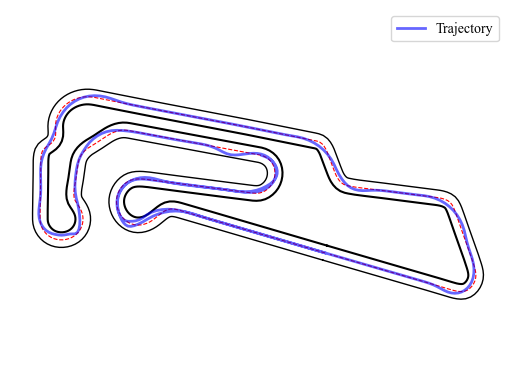

In [71]:
plt.figure()
plt.plot(state_history[0,:], state_history[1,:], 'b-', linewidth= 2, alpha =0.6, label = 'Trajectory')
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
plt.legend(prop={'size': 10})
plt.axis('equal')
plt.axis('off')
plt.show()

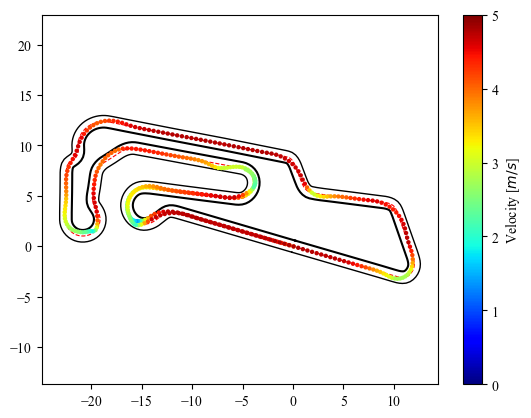

In [72]:
plt.figure()
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')

sc = plt.scatter(state_history[0, :-1], state_history[1,:-1], s = 10, 
                c=state_history[2,:-1], cmap=cm.jet, 
                vmin=0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label(r"Velocity [$m/s$]", size=10)
plt.axis('equal')
plt.show()

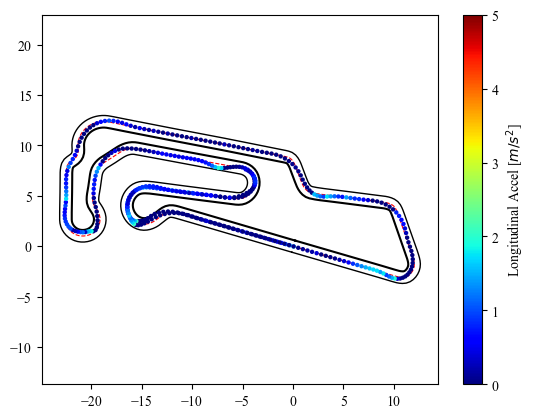

In [73]:
plt.figure()
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
sc = plt.scatter(state_history[0, :-1], state_history[1,:-1], s = 10, 
                c=control_history[0,:], cmap=cm.jet, 
                vmin=0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label(r"Longitudinal Accel [$m/s^2$]", size=10)
plt.axis('equal')
plt.show()

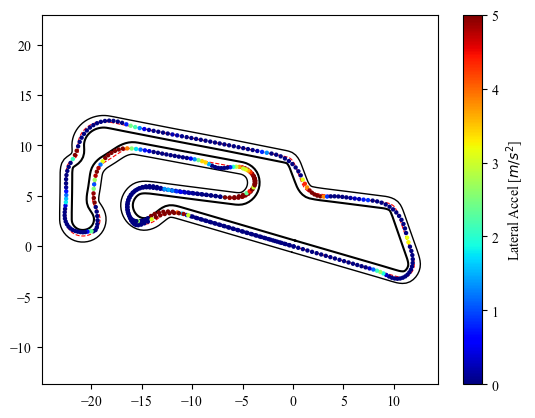

In [74]:
plt.figure()
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
alat = state_history[2,:]**2*np.tan(state_history[-1,:])/0.257
sc = plt.scatter(state_history[0, ], state_history[1,], s = 10, 
                c=alat, cmap=cm.jet, 
                vmin = 0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label(r"Lateral Accel [$m/s^2$]", size=10)
plt.axis('equal')
plt.show()

In [75]:
sim = plt.figure()
ref_path.plot_track()
plan_plot = plt.plot([], [], linewidth= 2)[0]
traj_plot = plt.scatter([], [], s = 10, c=[], cmap=cm.jet, vmin=0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(traj_plot)
cbar.set_label(r"velocity [$m/s$]", size=20)
plt.axis('equal')
plt.close()

def drawframe(n):
    traj_plot.set_offsets(state_history[:2,:n+1].T)
    traj_plot.set_array(state_history[2,:n+1])
    plan_plot.set_data(plan_history[0,:, n], plan_history[1,:, n])
    
    return (traj_plot,plan_plot)


# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(sim, drawframe, frames=itr_receding, interval=ilqr.dt*1000, blit=True)
HTML(anim.to_html5_video())